# TOPIC: Term Deposit Subscription Prediction

## Introduction

The project is focused on predicting term deposit subscription of a bank from the bank's marketting dataset. In today's competitive banking industry customer acquisition and retention are vital for Bank's success. The ability to accurately identify potential customers can significantly impact bank's marketting strategy and overall business success. The aim of this project is to build a model which will provide valuable insights to the bank, enabling them to allocate their marketing resources more efficiently and tailor their promotional efforts to those customers who are more likely to convert. 

## Business Objective

Term Deposit is a type of investment done in a bank who give a certain rate of interest on a condition that the deposited amount cannot be withdrawn until the term ends. Term deposits are important because within the term of the investment banks can lend this money to the businesses and earn from the interest. Term Depositd are one of the best investment options for many people who are looking for stable and safe return on their investments. Banks spend lots of money in direct and indirect marketting to acquire customers to invest in their term deposit plans. Therefore it is very important for the banks to identify potential customers who are eger to invest in term deposit plans thereby they can spend there marketting budget more efficiently to reach out to these people and convert them into customers.  

### Importing The Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import plotly.figure_factory as ff
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [5]:
import optuna
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_roc_curve

In [7]:
import association_metrics as am
from dython.nominal import associations

In [8]:
train=pd.read_csv('Train_eP48B9k.csv')
test=pd.read_csv('Test_jPKyvmK.csv')

## Data Understanding

In [206]:
train.head(20)

id  customer_age     job_type   marital  education default  balance  \
0   id_43823          28.0   management    single   tertiary      no    285.0   
1   id_32289          34.0  blue-collar   married  secondary      no    934.0   
2   id_10523          46.0   technician   married  secondary      no    656.0   
3   id_43951          34.0     services    single  secondary      no      2.0   
4   id_40992          41.0  blue-collar   married    primary      no   1352.0   
5   id_12681          65.0      retired   married    primary      no   2880.0   
6   id_41178          57.0  blue-collar   married    primary      no    495.0   
7   id_35102          37.0   management   married   tertiary      no    650.0   
8   id_34750          29.0   technician   married  secondary      no    265.0   
9    id_1406          50.0  blue-collar   married  secondary      no    407.0   
10   id_2153          52.0  blue-collar   married   tertiary      no   1779.0   
11  id_17866          35.0   technician    single  secondary      no   5212.0   
12  id_36237          18.0  blue-collar    single  secondary      no    420.0   
13  id_43255          50.0   management   married  secondary      no   4873.0   
14   id_5735          55.0  blue-collar   married    primary      no    762.0   
15  id_12246          42.0   management   married   tertiary      no     55.0   
16  id_19188          37.0  blue-collar    single    primary      no      3.0   
17  id_31616          41.0   technician   married  secondary      no     -3.0   
18  id_17398          41.0     services   married  secondary      no   -145.0   
19  id_32668          53.0      retired  divorced  secondary     yes   -204.0   

   housing_loan personal_loan communication_type  day_of_month month  \
0           yes            no            unknown            26   jun   
1            no           yes           cellular            18   nov   
2            no            no           cellular             5   feb   
3           yes            no            unknown            20   may   
4           yes            no           cellular            13   may   
5            no            no           cellular            23   apr   
6            no            no           cellular            18   aug   
7           yes           NaN            unknown            26   may   
8           yes            no           cellular            19   aug   
9           yes           yes           cellular             7   aug   
10           no            no           cellular            19   nov   
11          yes            no           cellular             7   may   
12          yes            no           cellular            16   apr   
13           no            no          telephone             6   feb   
14           no            no            unknown            18   jun   
15          yes            no           cellular            17   nov   
16           no            no            unknown             5   jun   
17          yes            no           cellular            16   apr   
18           no           yes            unknown             6   jun   
19           no           yes            unknown             6   jun   

    last_contact_duration  num_contacts_in_campaign  \
0                   303.0                       4.0   
1                   143.0                       2.0   
2                   101.0                       4.0   
3                   127.0                       3.0   
4                    49.0                       2.0   
5                   163.0                       1.0   
6                   687.0                       4.0   
7                   210.0                       1.0   
8                   160.0                       2.0   
9                   233.0                       2.0   
10                 1195.0                       3.0   
11                  303.0                       2.0   
12                  478.0                       1.0   
13                  381.0

In [207]:
pd.set_option('display.max_rows', None)

In [208]:
test.head()

id  customer_age     job_type   marital  education default  balance  \
0  id_17231          55.0      retired   married   tertiary      no   7136.0   
1  id_34508          24.0  blue-collar    single  secondary      no    179.0   
2  id_44504          46.0   technician  divorced  secondary      no    143.0   
3    id_174          56.0    housemaid    single    unknown      no   6023.0   
4   id_2115          62.0      retired   married  secondary      no   2913.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0           no            no           cellular            13   aug   
1          yes            no           cellular            18   may   
2           no            no           cellular             8   jul   
3           no            no            unknown             6   jun   
4           no            no           cellular            12   apr   

   last_contact_duration  num_contacts_in_campaign  \
0                   90.0                       2.0   
1                   63.0                       2.0   
2                  208.0                       1.0   
3                   34.0                       1.0   
4                  127.0                       1.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                               NaN                           0   
1                               NaN                           0   
2                               NaN                           0   
3                               NaN                           0   
4                             188.0                           1   

  prev_campaign_outcome  
0               unknown  
1               unknown  
2               unknown  
3               unknown  
4               success

In [209]:
train.shape

(31647, 18)

In [210]:
df_train=train.copy()
df_test=test.copy()

In [211]:
df_train.isnull().sum()

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [212]:
train.isnull().sum()/len(train)

id                                  0.000000
customer_age                        0.019560
job_type                            0.000000
marital                             0.004740
education                           0.000000
default                             0.000000
balance                             0.012608
housing_loan                        0.000000
personal_loan                       0.004708
communication_type                  0.000000
day_of_month                        0.000000
month                               0.000000
last_contact_duration               0.009827
num_contacts_in_campaign            0.003539
days_since_prev_campaign_contact    0.816223
num_contacts_prev_campaign          0.000000
prev_campaign_outcome               0.000000
term_deposit_subscribed             0.000000
dtype: float64

In [213]:
test.isnull().sum()

id                                      0
customer_age                          270
job_type                                0
marital                                81
education                               0
default                                 0
balance                               181
housing_loan                            0
personal_loan                          74
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 122
num_contacts_in_campaign               45
days_since_prev_campaign_contact    11123
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
dtype: int64

In [214]:
test.isnull().sum()/len(test)

id                                  0.000000
customer_age                        0.019906
job_type                            0.000000
marital                             0.005972
education                           0.000000
default                             0.000000
balance                             0.013344
housing_loan                        0.000000
personal_loan                       0.005456
communication_type                  0.000000
day_of_month                        0.000000
month                               0.000000
last_contact_duration               0.008994
num_contacts_in_campaign            0.003318
days_since_prev_campaign_contact    0.820038
num_contacts_prev_campaign          0.000000
prev_campaign_outcome               0.000000
dtype: float64

In [215]:
test.shape

(13564, 17)

In [216]:
id, target = 'id','term_Deposit_subscribed'

In [217]:
train.head()

id  customer_age     job_type  marital  education default  balance  \
0  id_43823          28.0   management   single   tertiary      no    285.0   
1  id_32289          34.0  blue-collar  married  secondary      no    934.0   
2  id_10523          46.0   technician  married  secondary      no    656.0   
3  id_43951          34.0     services   single  secondary      no      2.0   
4  id_40992          41.0  blue-collar  married    primary      no   1352.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0          yes            no            unknown            26   jun   
1           no           yes           cellular            18   nov   
2           no            no           cellular             5   feb   
3          yes            no            unknown            20   may   
4          yes            no           cellular            13   may   

   last_contact_duration  num_contacts_in_campaign  \
0                  303.0                       4.0   
1                  143.0                       2.0   
2                  101.0                       4.0   
3                  127.0                       3.0   
4                   49.0                       2.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                               NaN                           0   
1                             132.0                           1   
2                               NaN                           0   
3                               NaN                           0   
4                               NaN                           0   

  prev_campaign_outcome  term_deposit_subscribed  
0               unknown                        0  
1                 other                        0  
2               unknown                        0  
3               unknown                        0  
4               unknown                        0

In [218]:
train.duplicated().sum()

0

In [219]:
test.duplicated().sum()

0

In [220]:
train.nunique()

id                                  31647
customer_age                           77
job_type                               12
marital                                 3
education                               4
default                                 2
balance                              6563
housing_loan                            2
personal_loan                           2
communication_type                      3
day_of_month                           31
month                                  12
last_contact_duration                1447
num_contacts_in_campaign               46
days_since_prev_campaign_contact      511
num_contacts_prev_campaign             41
prev_campaign_outcome                   4
term_deposit_subscribed                 2
dtype: int64

In [221]:
test.nunique()

id                                  13564
customer_age                           73
job_type                               12
marital                                 3
education                               4
default                                 2
balance                              4414
housing_loan                            2
personal_loan                           2
communication_type                      3
day_of_month                           31
month                                  12
last_contact_duration                1186
num_contacts_in_campaign               38
days_since_prev_campaign_contact      417
num_contacts_prev_campaign             30
prev_campaign_outcome                   4
dtype: int64

In [222]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

## Data Preparation

### Missing value Imputation

In [223]:
df_train.shape

(31647, 18)

In [224]:
df_train.replace("unknown", np.nan, inplace=True)

In [225]:
df_test.replace("unknown", np.nan, inplace=True)

In [226]:
df_train.isnull().sum()

id                                      0
customer_age                          619
job_type                              199
marital                               150
education                            1292
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                   9151
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome               25833
term_deposit_subscribed                 0
dtype: int64

In [227]:
df_test.isnull().sum()

id                                      0
customer_age                          270
job_type                               89
marital                                81
education                             565
default                                 0
balance                               181
housing_loan                            0
personal_loan                          74
communication_type                   3869
day_of_month                            0
month                                   0
last_contact_duration                 122
num_contacts_in_campaign               45
days_since_prev_campaign_contact    11123
num_contacts_prev_campaign              0
prev_campaign_outcome               11126
dtype: int64

In [228]:
df_train.isnull().sum()* 100/ len(df_train) 

id                                   0.000000
customer_age                         1.955952
job_type                             0.628812
marital                              0.473979
education                            4.082535
default                              0.000000
balance                              1.260783
housing_loan                         0.000000
personal_loan                        0.470819
communication_type                  28.915853
day_of_month                         0.000000
month                                0.000000
last_contact_duration                0.982716
num_contacts_in_campaign             0.353904
days_since_prev_campaign_contact    81.622271
num_contacts_prev_campaign           0.000000
prev_campaign_outcome               81.628590
term_deposit_subscribed              0.000000
dtype: float64

In [229]:
df_test.isnull().sum()* 100/ len(df_test) 

id                                   0.000000
customer_age                         1.990563
job_type                             0.656149
marital                              0.597169
education                            4.165438
default                              0.000000
balance                              1.334415
housing_loan                         0.000000
personal_loan                        0.545562
communication_type                  28.524034
day_of_month                         0.000000
month                                0.000000
last_contact_duration                0.899440
num_contacts_in_campaign             0.331761
days_since_prev_campaign_contact    82.003834
num_contacts_prev_campaign           0.000000
prev_campaign_outcome               82.025951
dtype: float64

In [230]:
df_train['days_since_prev_campaign_contact']=df_train['days_since_prev_campaign_contact'].replace(np.nan,999)
df_train.head()

id  customer_age     job_type  marital  education default  balance  \
0  id_43823          28.0   management   single   tertiary      no    285.0   
1  id_32289          34.0  blue-collar  married  secondary      no    934.0   
2  id_10523          46.0   technician  married  secondary      no    656.0   
3  id_43951          34.0     services   single  secondary      no      2.0   
4  id_40992          41.0  blue-collar  married    primary      no   1352.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0          yes            no                NaN            26   jun   
1           no           yes           cellular            18   nov   
2           no            no           cellular             5   feb   
3          yes            no                NaN            20   may   
4          yes            no           cellular            13   may   

   last_contact_duration  num_contacts_in_campaign  \
0                  303.0                       4.0   
1                  143.0                       2.0   
2                  101.0                       4.0   
3                  127.0                       3.0   
4                   49.0                       2.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                             999.0                           0   
1                             132.0                           1   
2                             999.0                           0   
3                             999.0                           0   
4                             999.0                           0   

  prev_campaign_outcome  term_deposit_subscribed  
0                   NaN                        0  
1                 other                        0  
2                   NaN                        0  
3                   NaN                        0  
4                   NaN                        0

In [231]:
df_test['days_since_prev_campaign_contact']=df_test['days_since_prev_campaign_contact'].replace(np.nan,999)
df_test.head()

id  customer_age     job_type   marital  education default  balance  \
0  id_17231          55.0      retired   married   tertiary      no   7136.0   
1  id_34508          24.0  blue-collar    single  secondary      no    179.0   
2  id_44504          46.0   technician  divorced  secondary      no    143.0   
3    id_174          56.0    housemaid    single        NaN      no   6023.0   
4   id_2115          62.0      retired   married  secondary      no   2913.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0           no            no           cellular            13   aug   
1          yes            no           cellular            18   may   
2           no            no           cellular             8   jul   
3           no            no                NaN             6   jun   
4           no            no           cellular            12   apr   

   last_contact_duration  num_contacts_in_campaign  \
0                   90.0                       2.0   
1                   63.0                       2.0   
2                  208.0                       1.0   
3                   34.0                       1.0   
4                  127.0                       1.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                             999.0                           0   
1                             999.0                           0   
2                             999.0                           0   
3                             999.0                           0   
4                             188.0                           1   

  prev_campaign_outcome  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4               success

In [232]:
df_train['balance']=df_train['balance'].replace(np.nan,df_train['balance'].median())

In [233]:
df_test['balance']=df_test['balance'].replace(np.nan,df_test['balance'].median())

In [234]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_train1 = df_train.loc[:, ['customer_age']]
df_train1.head(5)
imputer.fit(df_train1)
df_imputed = imputer.transform(df_train1)
df_imputed[:5]
df_train1.loc[:, ['customer_age']] = df_imputed
df_train1.head()
df_train['customer_age'] = df_train1['customer_age'].round()
df_train.head()

id  customer_age     job_type  marital  education default  balance  \
0  id_43823          28.0   management   single   tertiary      no    285.0   
1  id_32289          34.0  blue-collar  married  secondary      no    934.0   
2  id_10523          46.0   technician  married  secondary      no    656.0   
3  id_43951          34.0     services   single  secondary      no      2.0   
4  id_40992          41.0  blue-collar  married    primary      no   1352.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0          yes            no                NaN            26   jun   
1           no           yes           cellular            18   nov   
2           no            no           cellular             5   feb   
3          yes            no                NaN            20   may   
4          yes            no           cellular            13   may   

   last_contact_duration  num_contacts_in_campaign  \
0                  303.0                       4.0   
1                  143.0                       2.0   
2                  101.0                       4.0   
3                  127.0                       3.0   
4                   49.0                       2.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                             999.0                           0   
1                             132.0                           1   
2                             999.0                           0   
3                             999.0                           0   
4                             999.0                           0   

  prev_campaign_outcome  term_deposit_subscribed  
0                   NaN                        0  
1                 other                        0  
2                   NaN                        0  
3                   NaN                        0  
4                   NaN                        0

In [235]:
imputer = KNNImputer()
df_test1 = df_test.loc[:, ['customer_age']]
df_test1.head(5)
imputer.fit(df_test1)
df_imputed = imputer.transform(df_test1)
df_imputed[:5]
df_test1.loc[:, ['customer_age']] = df_imputed
df_test1.head()
df_test['customer_age'] = df_test1['customer_age'].round()
df_test.head()

id  customer_age     job_type   marital  education default  balance  \
0  id_17231          55.0      retired   married   tertiary      no   7136.0   
1  id_34508          24.0  blue-collar    single  secondary      no    179.0   
2  id_44504          46.0   technician  divorced  secondary      no    143.0   
3    id_174          56.0    housemaid    single        NaN      no   6023.0   
4   id_2115          62.0      retired   married  secondary      no   2913.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0           no            no           cellular            13   aug   
1          yes            no           cellular            18   may   
2           no            no           cellular             8   jul   
3           no            no                NaN             6   jun   
4           no            no           cellular            12   apr   

   last_contact_duration  num_contacts_in_campaign  \
0                   90.0                       2.0   
1                   63.0                       2.0   
2                  208.0                       1.0   
3                   34.0                       1.0   
4                  127.0                       1.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                             999.0                           0   
1                             999.0                           0   
2                             999.0                           0   
3                             999.0                           0   
4                             188.0                           1   

  prev_campaign_outcome  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4               success

In [236]:
df_train['communication_type'].fillna(df_train['communication_type'].mode().values[0], inplace=True)

In [237]:
df_test['communication_type'].fillna(df_test['communication_type'].mode().values[0], inplace=True)

In [238]:
df_train.drop('prev_campaign_outcome',axis=1,inplace=True)

In [239]:
df_test.drop('prev_campaign_outcome',axis=1,inplace=True)

In [240]:
df_train.shape

(31647, 17)

In [241]:
df_train.isnull().sum()* 100/ len(df_train) 

id                                  0.000000
customer_age                        0.000000
job_type                            0.628812
marital                             0.473979
education                           4.082535
default                             0.000000
balance                             0.000000
housing_loan                        0.000000
personal_loan                       0.470819
communication_type                  0.000000
day_of_month                        0.000000
month                               0.000000
last_contact_duration               0.982716
num_contacts_in_campaign            0.353904
days_since_prev_campaign_contact    0.000000
num_contacts_prev_campaign          0.000000
term_deposit_subscribed             0.000000
dtype: float64

In [242]:
df_test.isnull().sum()* 100/ len(df_test) 

id                                  0.000000
customer_age                        0.000000
job_type                            0.656149
marital                             0.597169
education                           4.165438
default                             0.000000
balance                             0.000000
housing_loan                        0.000000
personal_loan                       0.545562
communication_type                  0.000000
day_of_month                        0.000000
month                               0.000000
last_contact_duration               0.899440
num_contacts_in_campaign            0.331761
days_since_prev_campaign_contact    0.000000
num_contacts_prev_campaign          0.000000
dtype: float64

In [243]:
Missing=df_train.columns[df_train.isnull().any()].tolist() 
Missing

['job_type',
 'marital',
 'education',
 'personal_loan',
 'last_contact_duration',
 'num_contacts_in_campaign']

In [244]:
Missing_test=df_test.columns[df_test.isnull().any()].tolist() 
Missing_test

['job_type',
 'marital',
 'education',
 'personal_loan',
 'last_contact_duration',
 'num_contacts_in_campaign']

In [245]:
df_train.shape

(31647, 17)

In [246]:
#we are droping the missing value as it is less than 5% of the total data
df_train.dropna(subset=Missing,inplace=True)

In [247]:
#we are droping the missing value as it is less than 5% of the total data
df_test.dropna(subset=Missing_test,inplace=True)

In [248]:
df_train.shape

(29544, 17)

In [249]:
df_train.isnull().sum()

id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
term_deposit_subscribed             0
dtype: int64

In [250]:
df_test.isnull().sum()

id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
dtype: int64

In [251]:
df_train.shape

(29544, 17)

In [252]:
df_train.drop('id',axis=1,inplace=True)

In [ ]:
categorical_train=df_train.select_dtypes(exclude=np.number).columns.tolist()
categorical_test=df_test.select_dtypes(exclude=np.number).columns.tolist()

In [ ]:
numerical_train=df_train.select_dtypes(include=np.number).columns.tolist()
numerical_test=df_test.select_dtypes(include=np.number).columns.tolist()

## EDA

### Checking outliers for our train dataset

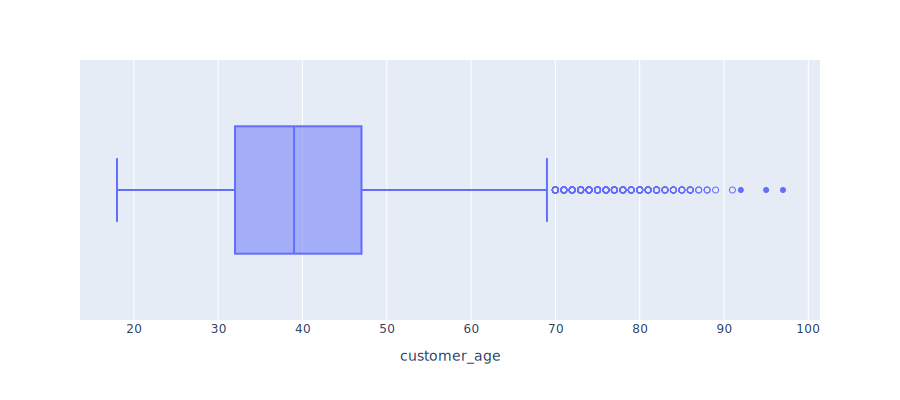

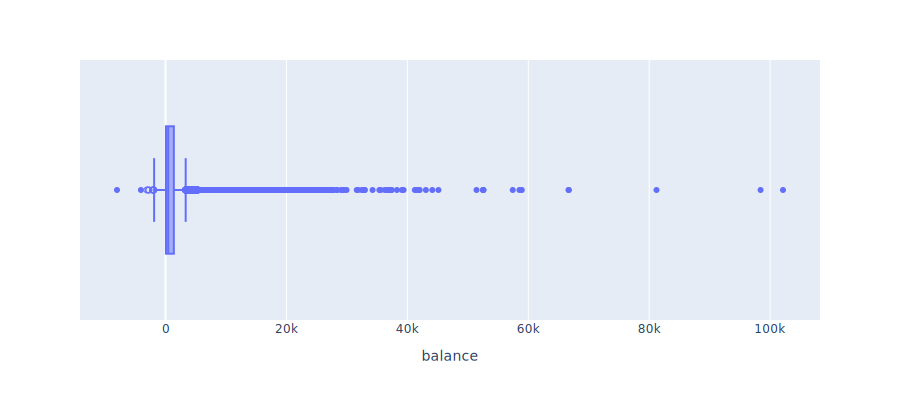

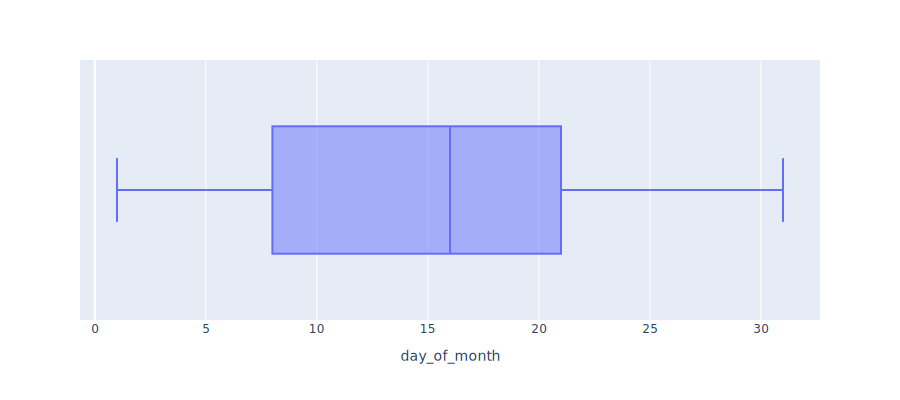

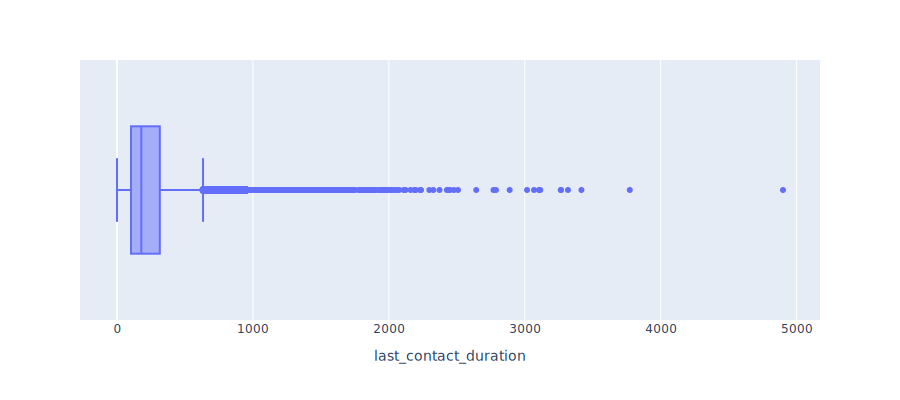

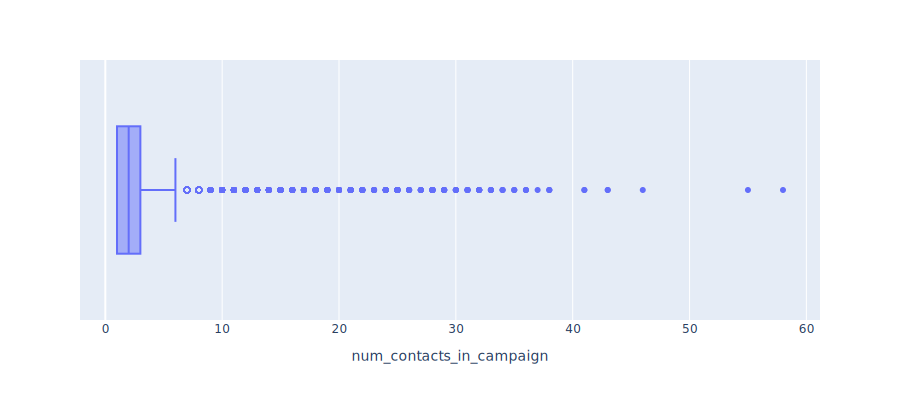

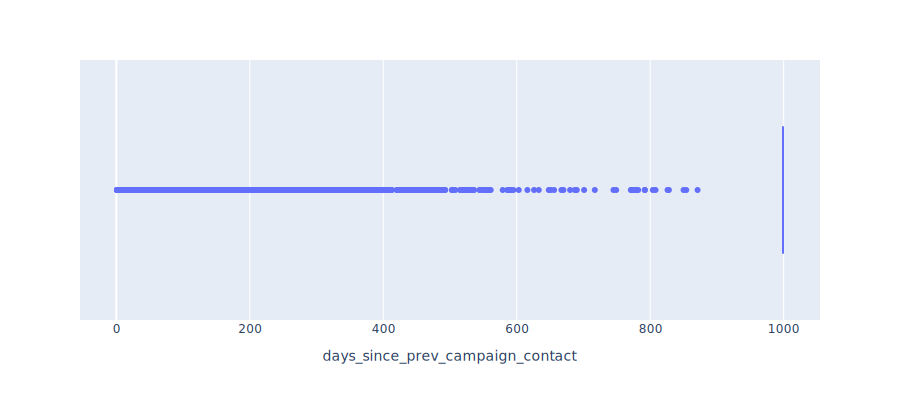

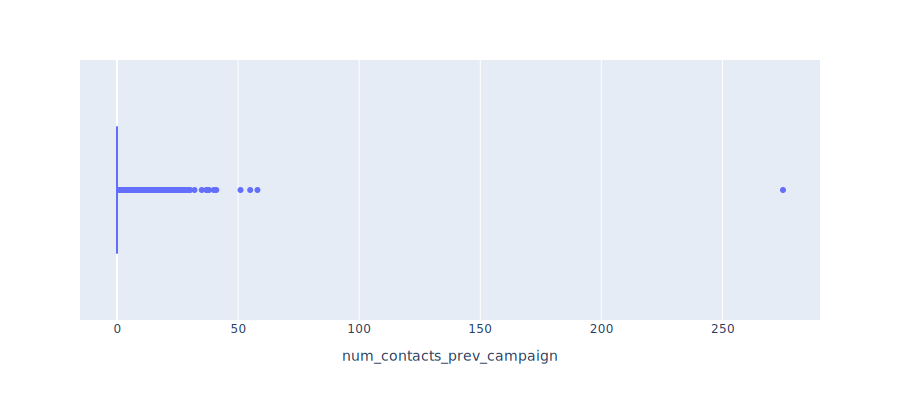

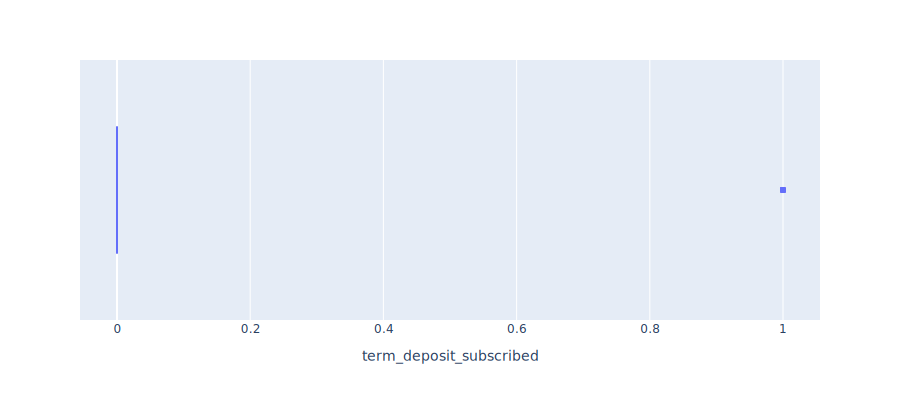

In [72]:
for column in numerical_train:
    fig=px.box(df_train,x=column,points='suspectedoutliers')
    fig.update_layout(width=900, height=400)
    fig.show('svg')

In [73]:
df_train.head()

customer_age     job_type  marital  education default  balance  \
0          28.0   management   single   tertiary      no    285.0   
1          34.0  blue-collar  married  secondary      no    934.0   
2          46.0   technician  married  secondary      no    656.0   
3          34.0     services   single  secondary      no      2.0   
4          41.0  blue-collar  married    primary      no   1352.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0          yes            no           cellular            26   jun   
1           no           yes           cellular            18   nov   
2           no            no           cellular             5   feb   
3          yes            no           cellular            20   may   
4          yes            no           cellular            13   may   

   last_contact_duration  num_contacts_in_campaign  \
0                  303.0                       4.0   
1                  143.0                       2.0   
2                  101.0                       4.0   
3                  127.0                       3.0   
4                   49.0                       2.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                             999.0                           0   
1                             132.0                           1   
2                             999.0                           0   
3                             999.0                           0   
4                             999.0                           0   

   term_deposit_subscribed  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0

In [74]:
df_train.term_deposit_subscribed.value_counts()

0    26395
1     3149
Name: term_deposit_subscribed, dtype: int64

### Checking outliers for our test data

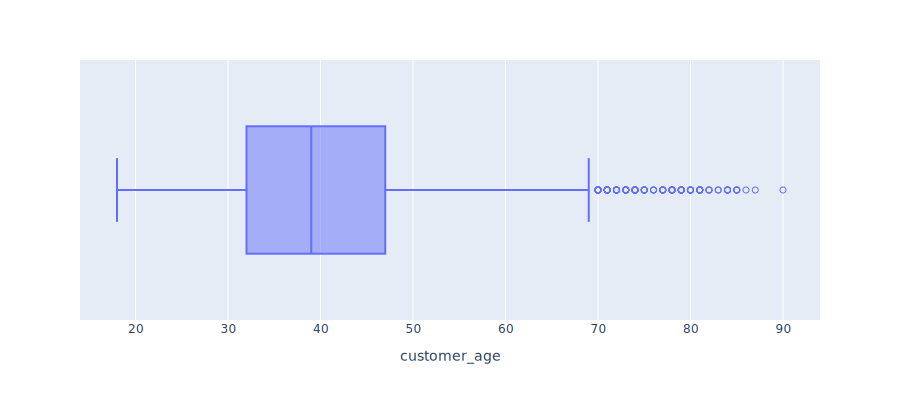

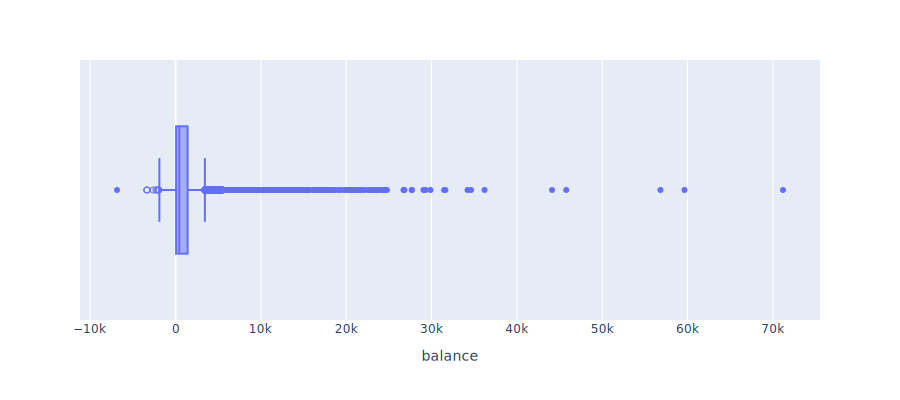

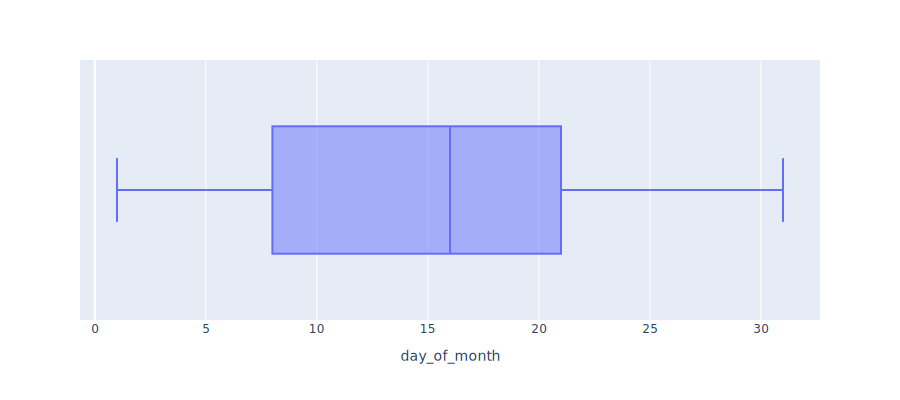

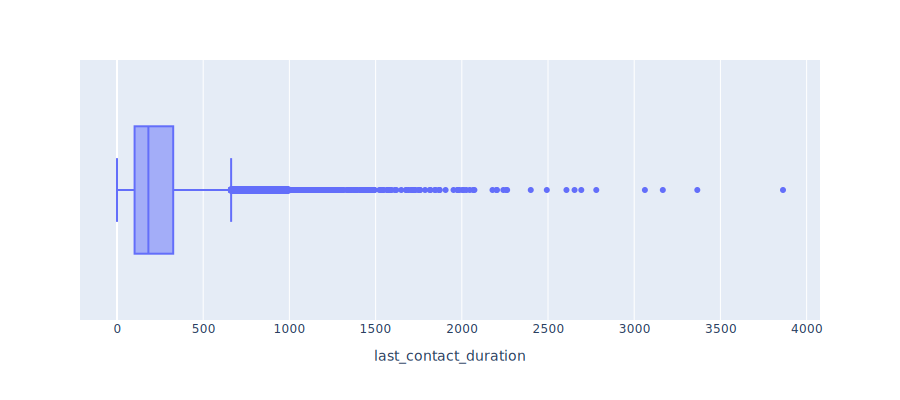

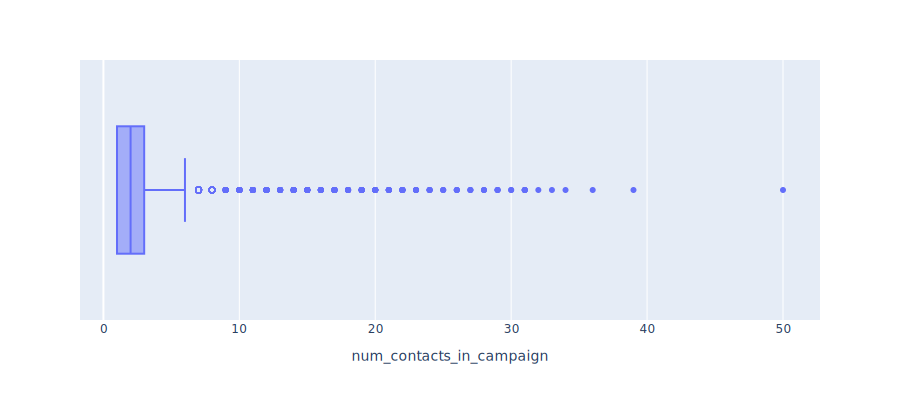

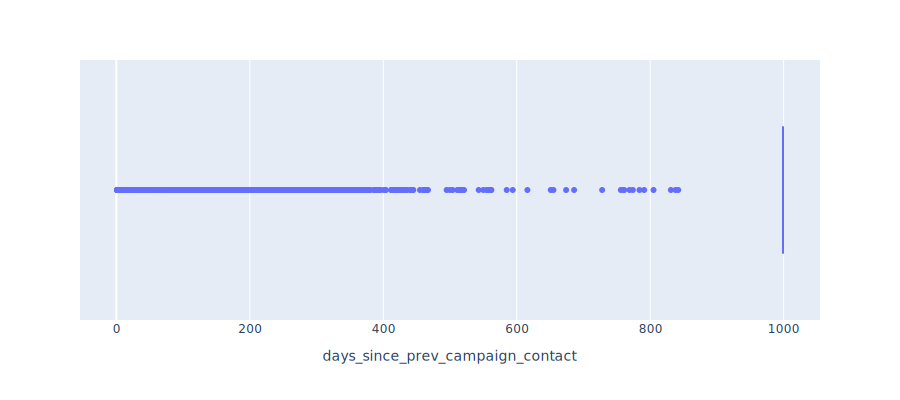

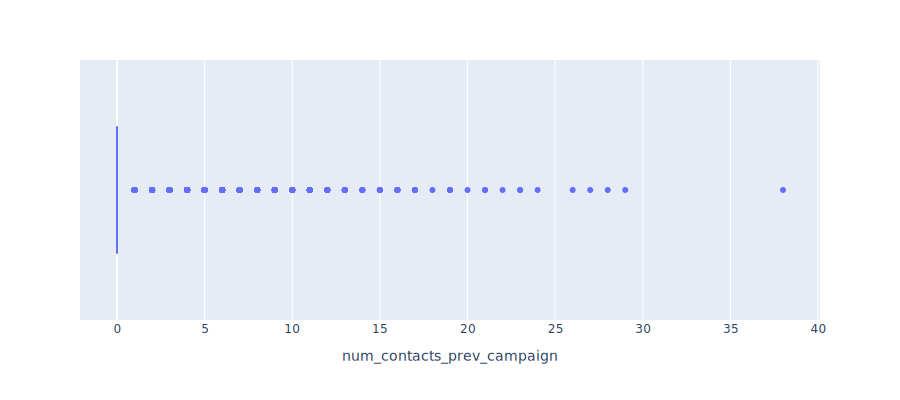

In [75]:
for column in numerical_test:
    fig=px.box(df_test,x=column,points='suspectedoutliers')
    fig.update_layout(width=900, height=400)
    fig.show('svg')

### Univariate Analysis

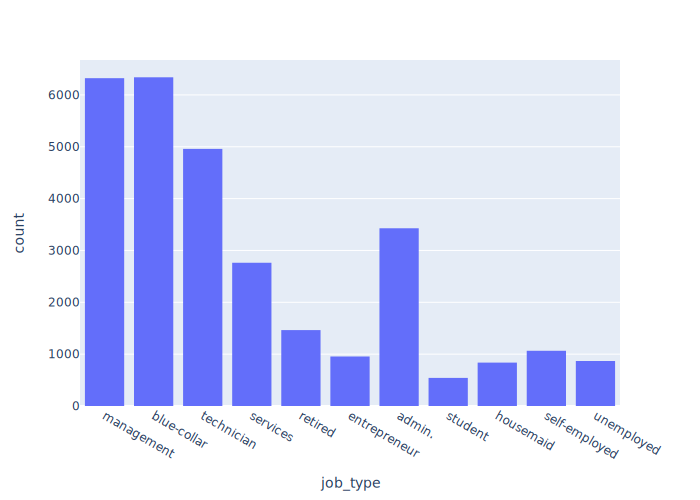

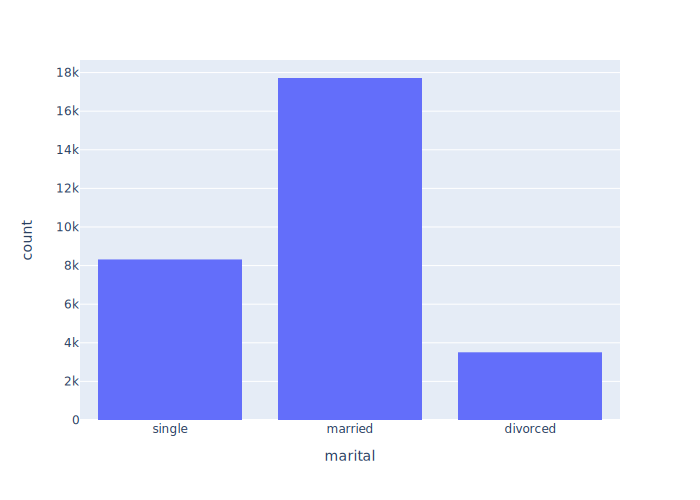

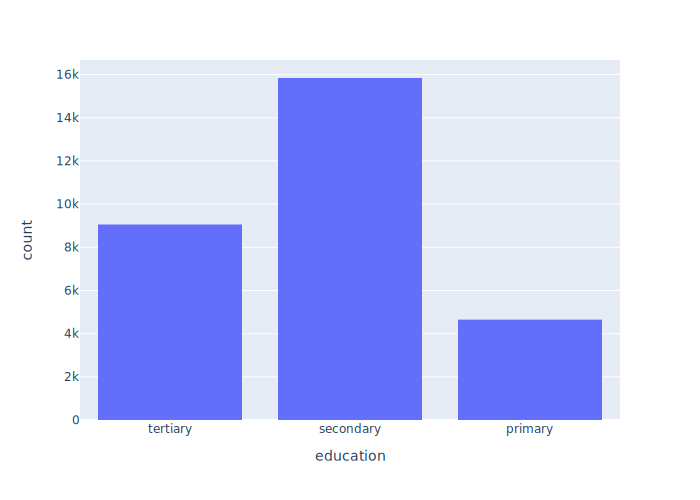

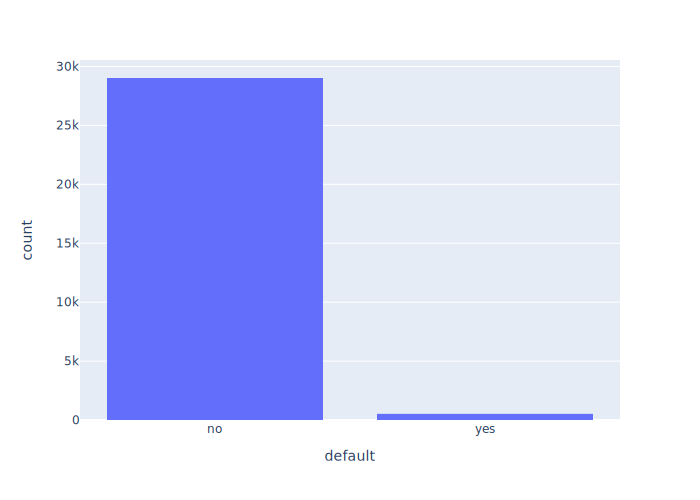

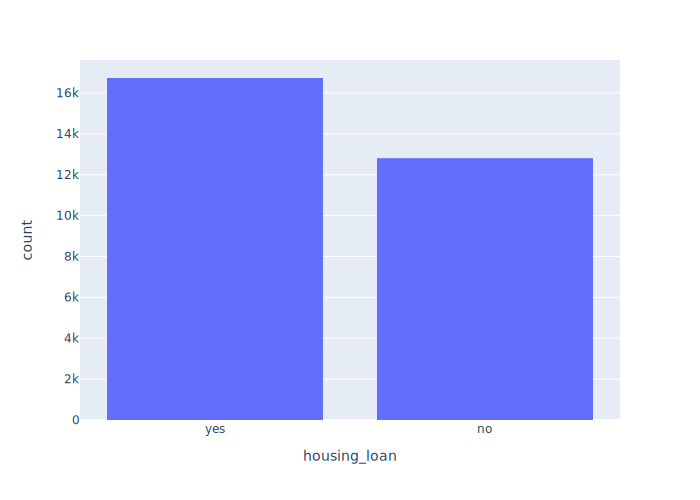

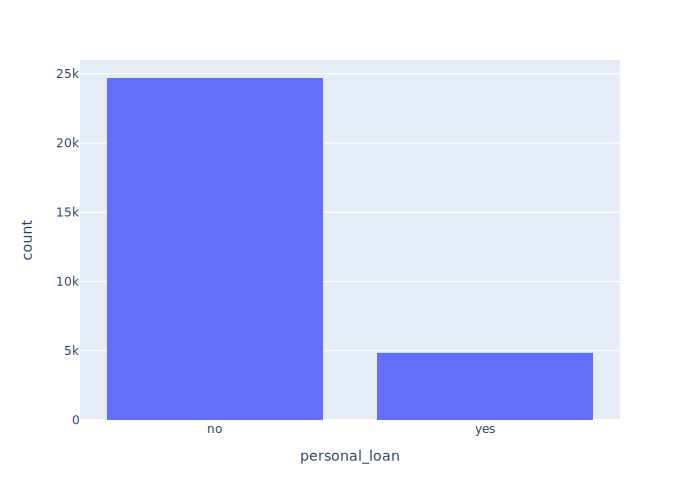

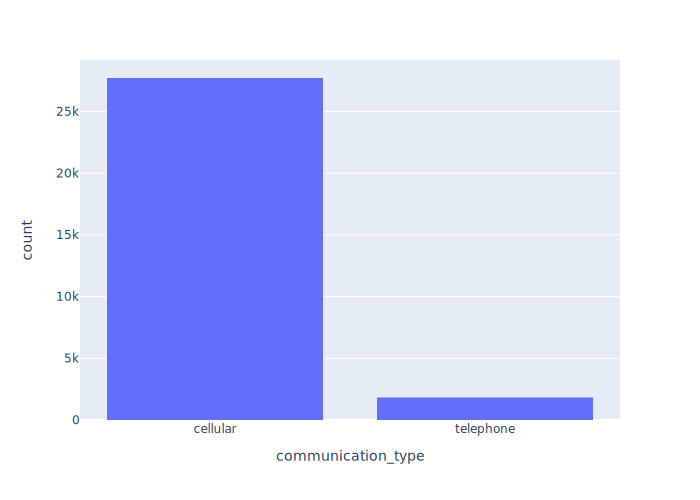

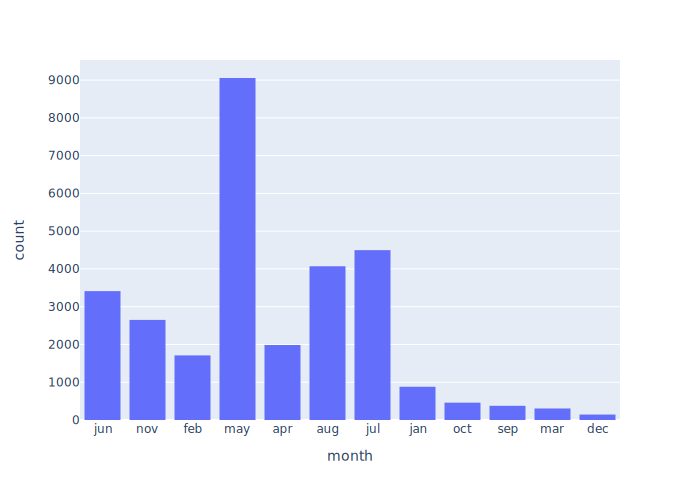

In [76]:
for column in categorical_train:
    fig=px.histogram(df_train,x=column)
    fig.show('svg')

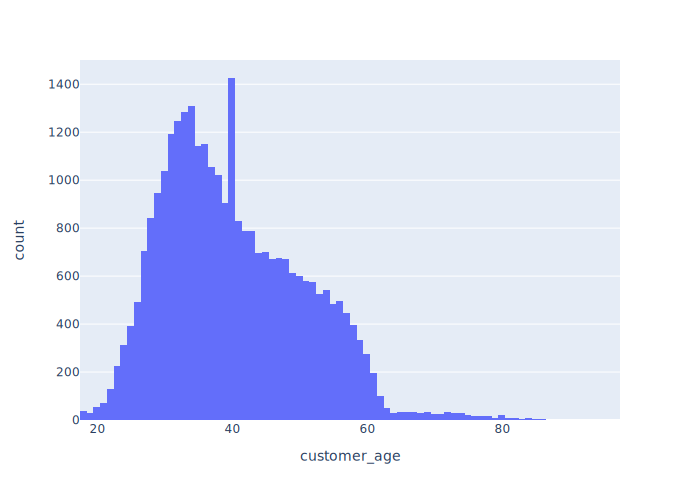

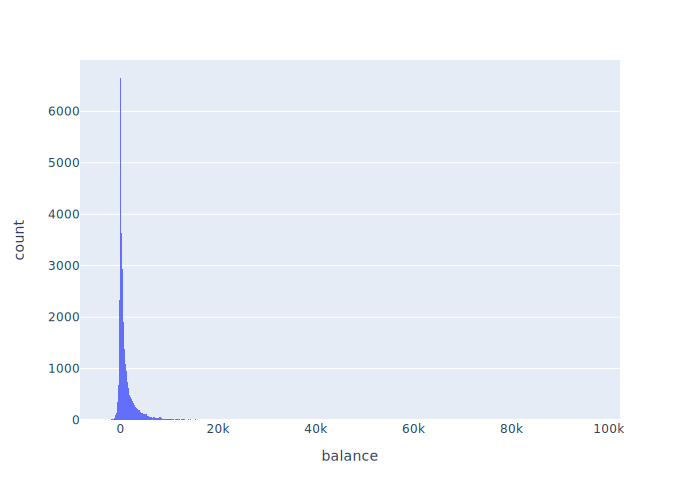

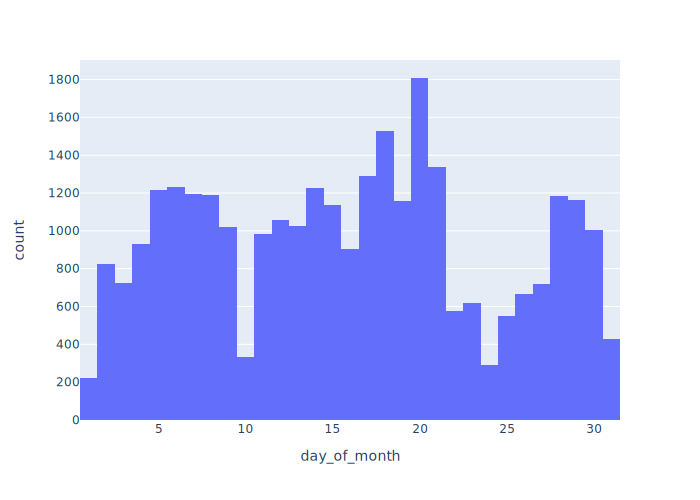

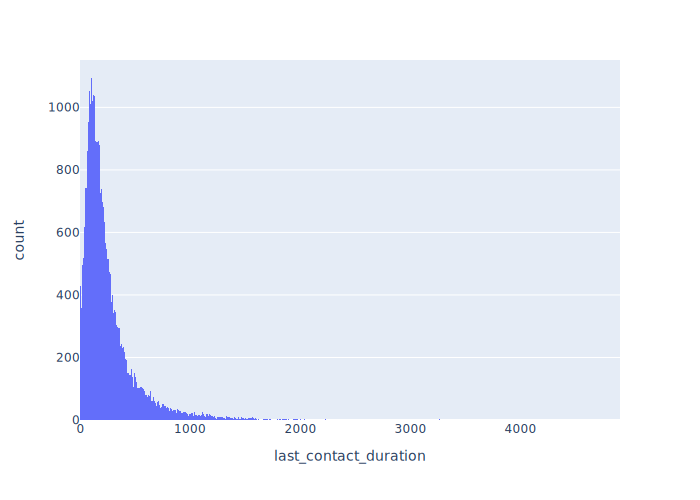

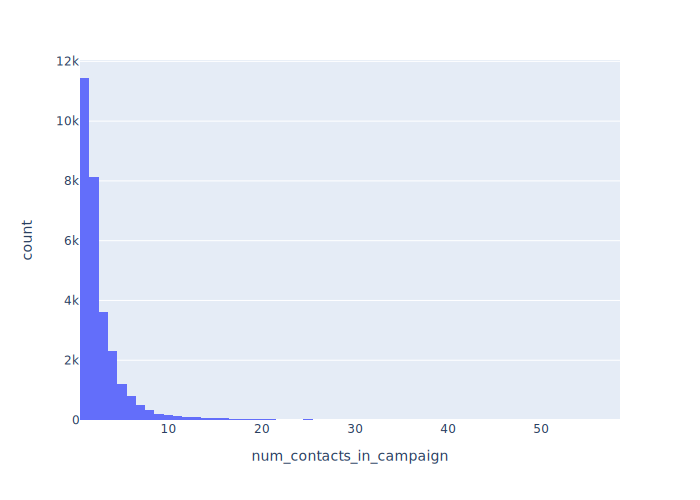

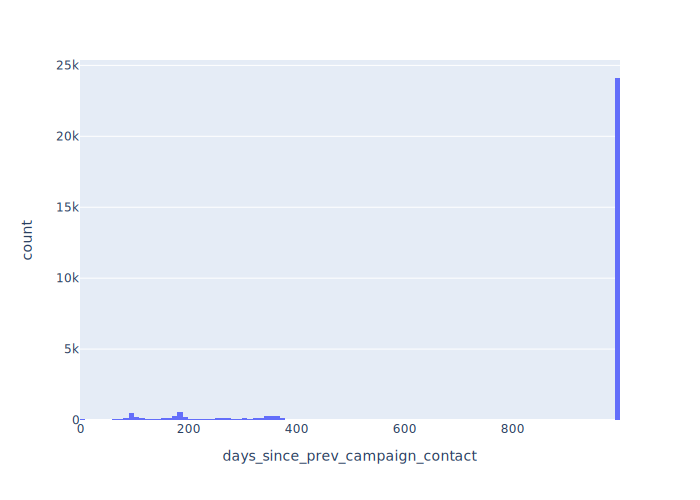

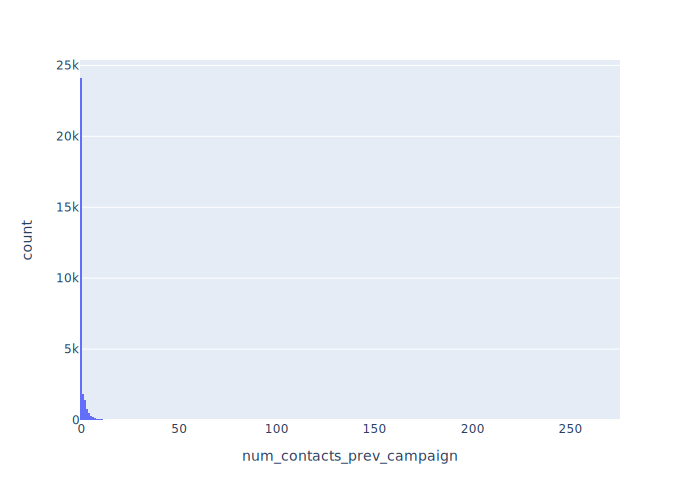

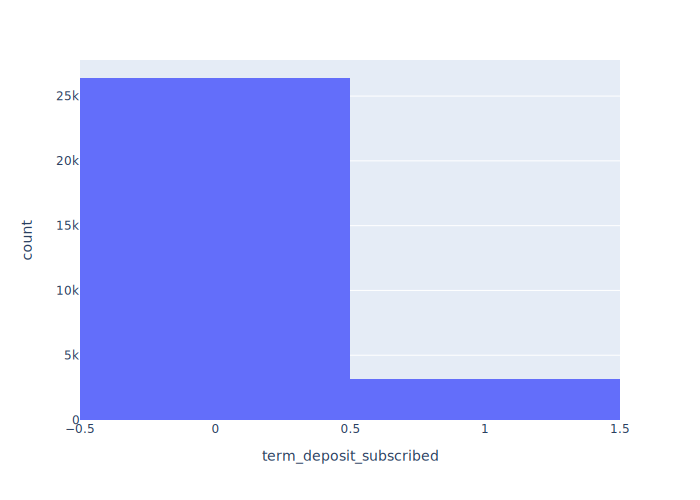

In [77]:
for column in numerical_train:
    fig=px.histogram(df_train,x=column)
    fig.show('svg')

### Bivariate Analysis

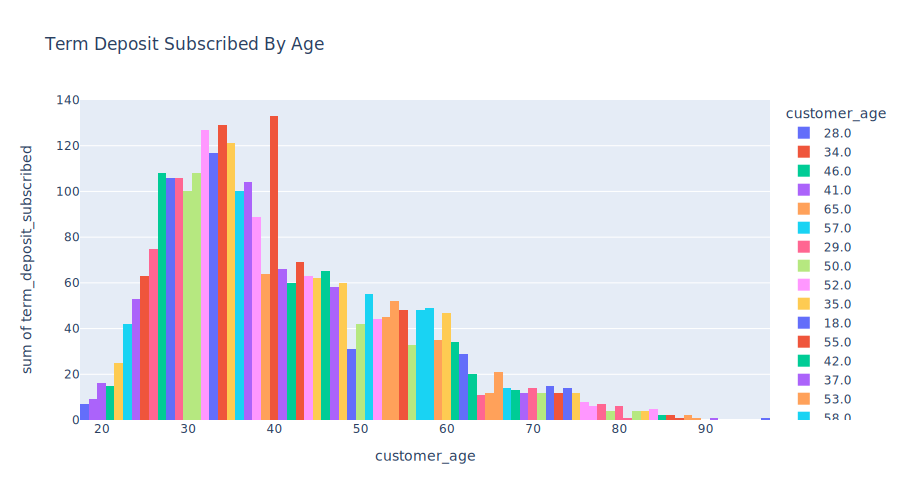

In [78]:
fig=px.histogram(df_train,x='customer_age',y='term_deposit_subscribed',color='customer_age',title='Term Deposit Subscribed By Age')
fig.update_layout(width=900, height=500)
fig.show('svg')

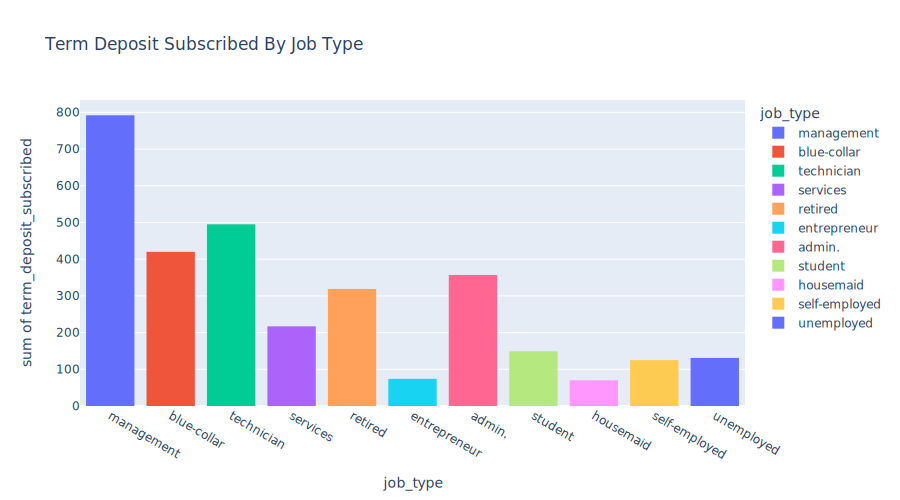

In [79]:
fig=px.histogram(df_train,x='job_type',y='term_deposit_subscribed',color='job_type',title='Term Deposit Subscribed By Job Type')
fig.update_layout(width=900, height=500)
fig.show('svg')

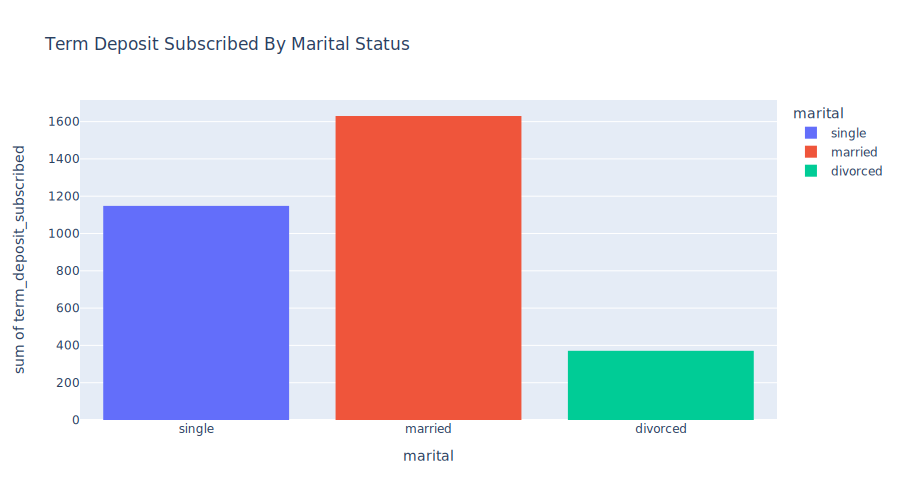

In [80]:
fig=px.histogram(df_train,x='marital',y='term_deposit_subscribed',color='marital',title='Term Deposit Subscribed By Marital Status')
fig.update_layout(width=900, height=500)
fig.show('svg')

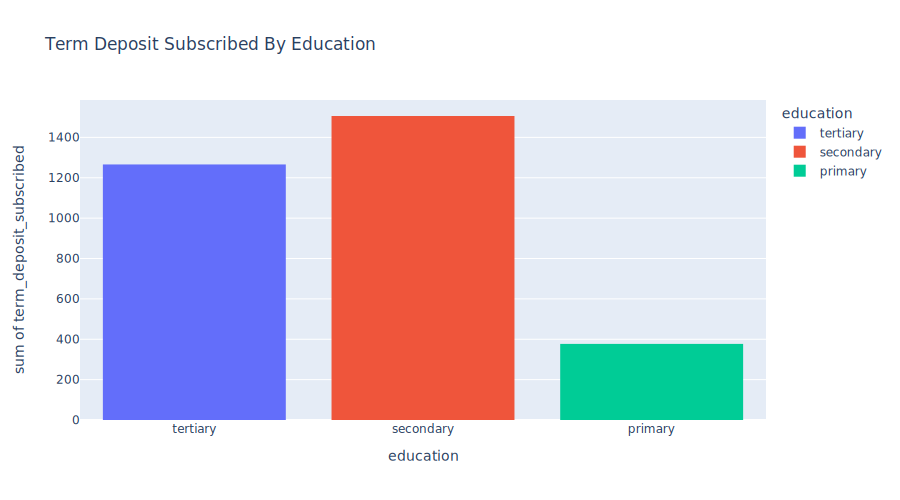

In [81]:
fig=px.histogram(df_train,x='education',y='term_deposit_subscribed',color='education',title='Term Deposit Subscribed By Education')
fig.update_layout(width=900, height=500)
fig.show('svg')

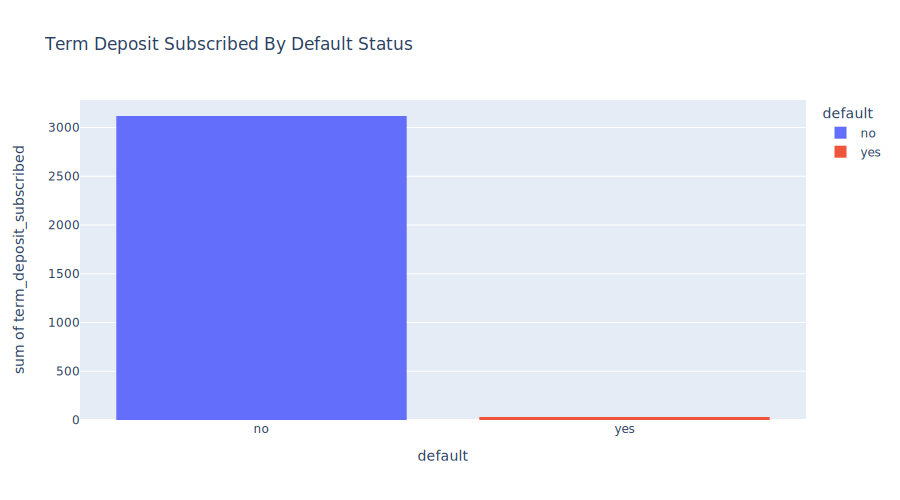

In [82]:
fig=px.histogram(df_train,x='default',y='term_deposit_subscribed',color='default',title='Term Deposit Subscribed By Default Status')
fig.update_layout(width=900, height=500)
fig.show('svg')

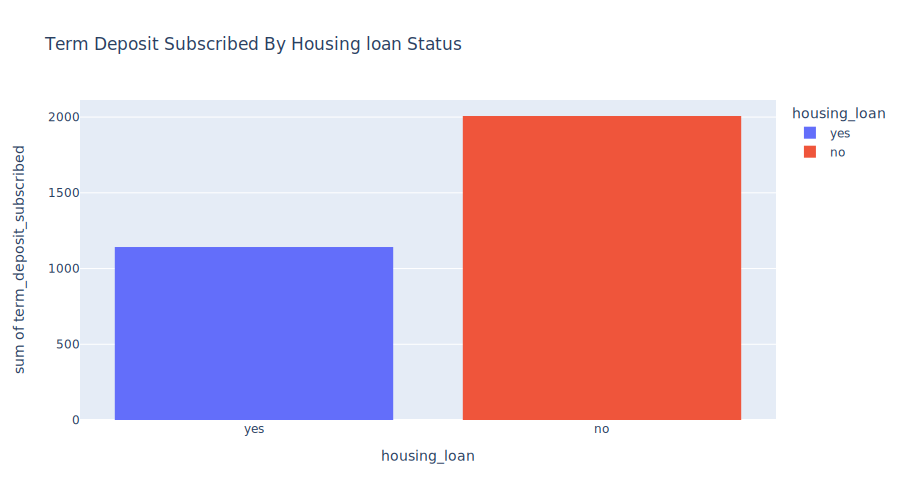

In [83]:
fig=px.histogram(df_train,x='housing_loan',y='term_deposit_subscribed',color='housing_loan',title='Term Deposit Subscribed By Housing loan Status')
fig.update_layout(width=900, height=500)
fig.show('svg')

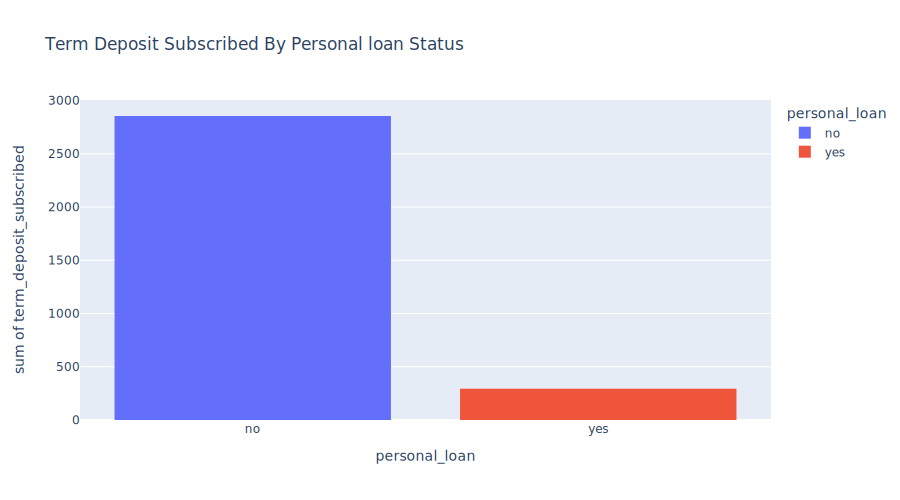

In [84]:
fig=px.histogram(df_train,x='personal_loan',y='term_deposit_subscribed',color='personal_loan',title='Term Deposit Subscribed By Personal loan Status')
fig.update_layout(width=900, height=500)
fig.show('svg')

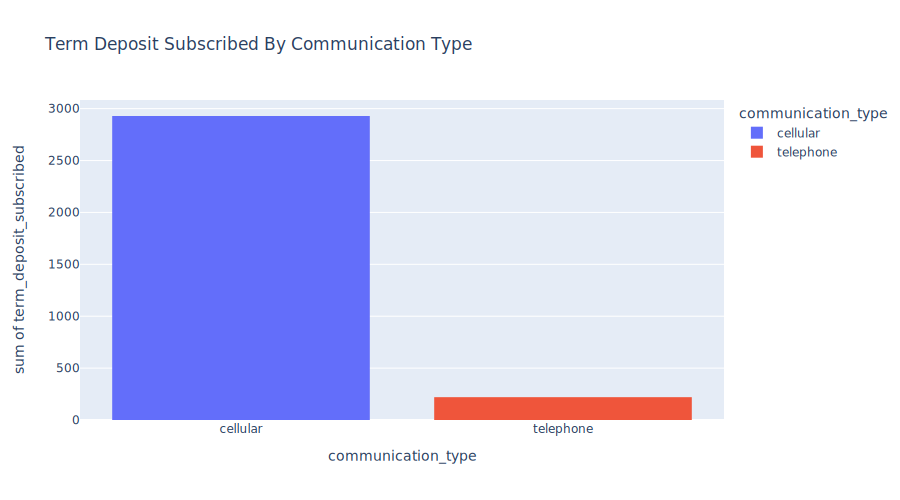

In [85]:
fig=px.histogram(df_train,x='communication_type',y='term_deposit_subscribed',color='communication_type',title='Term Deposit Subscribed By Communication Type')
fig.update_layout(width=900, height=500)
fig.show('svg')

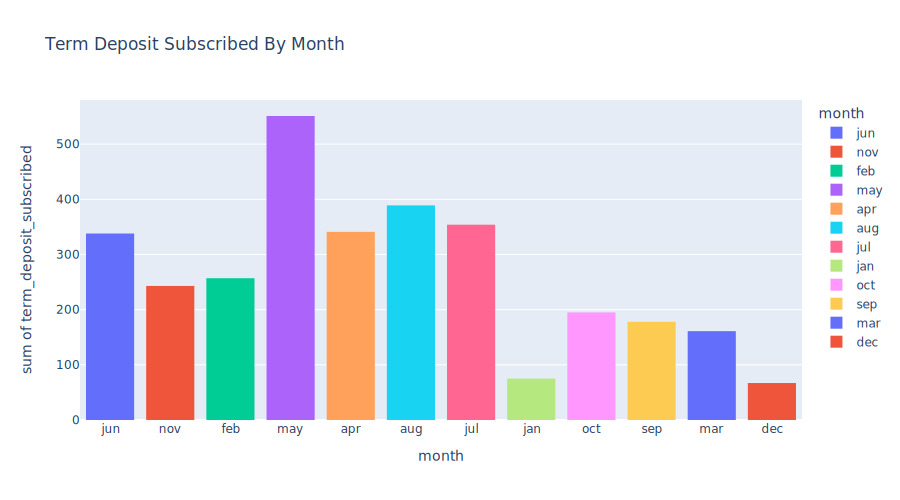

In [86]:
fig=px.histogram(df_train,x='month',y='term_deposit_subscribed',color='month',title='Term Deposit Subscribed By Month')
fig.update_layout(width=900, height=500)
fig.show('svg')

In [87]:
df_train['td_subscribed']=df_train['term_deposit_subscribed'].map({1:1,0:2})

In [88]:
df_train[df_train['job_type'].isnull()]

Empty DataFrame
Columns: [customer_age, job_type, marital, education, default, balance, housing_loan, personal_loan, communication_type, day_of_month, month, last_contact_duration, num_contacts_in_campaign, days_since_prev_campaign_contact, num_contacts_prev_campaign, term_deposit_subscribed, td_subscribed]
Index: []

In [89]:
td_count=[]
for i in df_train['job_type'].unique():
    n_yes = df_train[(df_train['td_subscribed'] == 1) & (df_train['job_type'] == i)].shape[0]
    n_no = df_train[(df_train['td_subscribed'] == 2) & (df_train['job_type'] == i)].shape[0]
    p_con= (n_yes/(n_yes+n_no))*100
    td_count.append({'Job Type': i, 'Count of td_subscribed': n_yes, 'Count of td_not_subscribed':n_no, 'percentage_subscribed':p_con})
df_td=pd.DataFrame(td_count)  
df_td.sort_values(by='percentage_subscribed')

Job Type  Count of td_subscribed  Count of td_not_subscribed  \
1     blue-collar                     420                        5920   
5    entrepreneur                      74                         881   
3        services                     217                        2546   
8       housemaid                      70                         767   
2      technician                     495                        4464   
6          admin.                     357                        3071   
9   self-employed                     125                         940   
0      management                     792                        5531   
10     unemployed                     131                         737   
4         retired                     319                        1145   
7         student                     149                         393   

    percentage_subscribed  
1                6.624606  
5                7.748691  
3                7.853782  
8                8.363202  
2                9.981851  
6               10.414236  
9               11.737089  
0               12.525700  
10              15.092166  
4               21.789617  
7               27.490775

In [90]:
td_count1=[]
for i in df_train['education'].unique():
    n_yes = df_train[(df_train['td_subscribed'] == 1) & (df_train['education'] == i)].shape[0]
    n_no = df_train[(df_train['td_subscribed'] == 2) & (df_train['education'] == i)].shape[0]
    p_con= (n_yes/(n_yes+n_no))*100
    td_count1.append({'Job Type': i, 'Count of td_subscribed': n_yes, 'Count of td_not_subscribed':n_no,'percentage_subscribed':p_con})
df_td1=pd.DataFrame(td_count1)  
df_td1.sort_values(by='percentage_subscribed')

Job Type  Count of td_subscribed  Count of td_not_subscribed  \
2    primary                     377                        4271   
1  secondary                    1506                       14335   
0   tertiary                    1266                        7789   

   percentage_subscribed  
2               8.111015  
1               9.506976  
0              13.981226

In [91]:
td_count2=[]
for i in df_train['month'].unique():
    n_yes = df_train[(df_train['td_subscribed'] == 1) & (df_train['month'] == i)].shape[0]
    n_no = df_train[(df_train['td_subscribed'] == 2) & (df_train['month'] == i)].shape[0]
    p_con= (n_yes/(n_yes+n_no))*100
    td_count2.append({'Job Type': i, 'Count of td_subscribed': n_yes, 'Count of td_not_subscribed':n_no,'percentage_subscribed':p_con})
df_td2=pd.DataFrame(td_count2)  
df_td2.sort_values(by='percentage_subscribed')

Job Type  Count of td_subscribed  Count of td_not_subscribed  \
3       may                     551                        8504   
6       jul                     354                        4143   
7       jan                      75                         805   
1       nov                     243                        2407   
5       aug                     389                        3681   
0       jun                     338                        3074   
2       feb                     257                        1453   
4       apr                     341                        1645   
8       oct                     195                         264   
11      dec                      67                          77   
9       sep                     178                         198   
10      mar                     161                         144   

    percentage_subscribed  
3                6.085036  
6                7.871915  
7                8.522727  
1                9.169811  
5                9.557740  
0                9.906213  
2               15.029240  
4               17.170191  
8               42.483660  
11              46.527778  
9               47.340426  
10              52.786885

## Feature Engineering

### Checking Multi-collinearity

In [92]:
df_train.corr()

customer_age   balance  day_of_month  \
customer_age                          1.000000  0.101924     -0.013934   
balance                               0.101924  1.000000     -0.001133   
day_of_month                         -0.013934 -0.001133      1.000000   
last_contact_duration                -0.006960  0.015499     -0.035320   
num_contacts_in_campaign              0.004158 -0.024148      0.170226   
days_since_prev_campaign_contact     -0.002887 -0.034952      0.085214   
num_contacts_prev_campaign           -0.000893  0.011370     -0.049726   
term_deposit_subscribed               0.031204  0.050943     -0.027133   
td_subscribed                        -0.031204 -0.050943      0.027133   

                                  last_contact_duration  \
customer_age                                  -0.006960   
balance                                        0.015499   
day_of_month                                  -0.035320   
last_contact_duration                          1.000000   
num_contacts_in_campaign                      -0.085815   
days_since_prev_campaign_contact              -0.006787   
num_contacts_prev_campaign                     0.005145   
term_deposit_subscribed                        0.421695   
td_subscribed                                 -0.421695   

                                  num_contacts_in_campaign  \
customer_age                                      0.004158   
balance                                          -0.024148   
day_of_month                                      0.170226   
last_contact_duration                            -0.085815   
num_contacts_in_campaign                          1.000000   
days_since_prev_campaign_contact                  0.110268   
num_contacts_prev_campaign                       -0.033281   
term_deposit_subscribed                          -0.070663   
td_subscribed                                     0.070663   

                                  days_since_prev_campaign_contact  \
customer_age                                             -0.002887   
balance                                                  -0.034952   
day_of_month                                              0.085214   
last_contact_duration                                    -0.006787   
num_contacts_in_campaign                                  0.110268   
days_since_prev_campaign_contact                          1.000000   
num_contacts_prev_campaign                               -0.488185   
term_deposit_subscribed                                  -0.185406   
td_subscribed                                             0.185406   

                                  num_contacts_prev_campaign  \
customer_age                                       -0.000893   
balance                                             0.011370   
day_of_month                                       -0.049726   
last_contact_duration                               0.005145   
num_contacts_in_campaign                           -0.033281   
days_since_prev_campaign_contact                   -0.488185   
num_contacts_prev_campaign                          1.000000   
term_deposit_subscribed                             0.087944   
td_subscribed                                      -0.087944   

                                  term_deposit_subscribed  td_subscribed  
customer_age                                     0.031204      -0.031204  
balance                                          0.050943      -0.050943  
day_of_month                                    -0.027133       0.027133  
last_contact_duration                            0.421695      -0.421695  
num_contacts_in_campaign                        -0.070663       0.070663  
days_since_prev_campaign_contact                -0.185406       0.185406  
num_contacts_prev_campaign                       0.087944      -0.087944  
term_deposit_subscribed                          1.000000      -1.000000  
td_subscribed                                   -1.000000       

<Axes: >

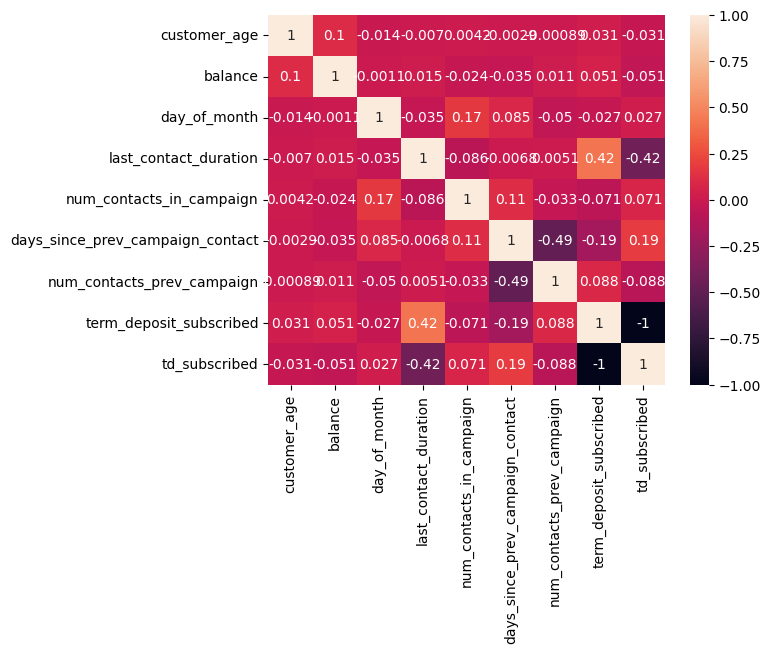

In [93]:
sns.heatmap(df_train.corr(),annot=True)

## Encoding categorical variable 

In [94]:
label_encoder = LabelEncoder()

In [95]:
Ex_train=df_train.copy()
Ex_train.head()

customer_age     job_type  marital  education default  balance  \
0          28.0   management   single   tertiary      no    285.0   
1          34.0  blue-collar  married  secondary      no    934.0   
2          46.0   technician  married  secondary      no    656.0   
3          34.0     services   single  secondary      no      2.0   
4          41.0  blue-collar  married    primary      no   1352.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0          yes            no           cellular            26   jun   
1           no           yes           cellular            18   nov   
2           no            no           cellular             5   feb   
3          yes            no           cellular            20   may   
4          yes            no           cellular            13   may   

   last_contact_duration  num_contacts_in_campaign  \
0                  303.0                       4.0   
1                  143.0                       2.0   
2                  101.0                       4.0   
3                  127.0                       3.0   
4                   49.0                       2.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                             999.0                           0   
1                             132.0                           1   
2                             999.0                           0   
3                             999.0                           0   
4                             999.0                           0   

   term_deposit_subscribed  td_subscribed  
0                        0              2  
1                        0              2  
2                        0              2  
3                        0              2  
4                        0              2

In [96]:
Ex_test=df_test.copy()
Ex_test.head()

id  customer_age       job_type   marital  education default  \
0  id_17231          55.0        retired   married   tertiary      no   
1  id_34508          24.0    blue-collar    single  secondary      no   
2  id_44504          46.0     technician  divorced  secondary      no   
4   id_2115          62.0        retired   married  secondary      no   
5  id_20153          35.0  self-employed    single   tertiary      no   

   balance housing_loan personal_loan communication_type  day_of_month month  \
0   7136.0           no            no           cellular            13   aug   
1    179.0          yes            no           cellular            18   may   
2    143.0           no            no           cellular             8   jul   
4   2913.0           no            no           cellular            12   apr   
5    355.0           no            no           cellular            12   aug   

   last_contact_duration  num_contacts_in_campaign  \
0                   90.0                       2.0   
1                   63.0                       2.0   
2                  208.0                       1.0   
4                  127.0                       1.0   
5                  599.0                       1.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  
0                             999.0                           0  
1                             999.0                           0  
2                             999.0                           0  
4                             188.0                           1  
5                             999.0                           0

In [97]:
Ex_test.drop('id',axis=1,inplace=True)

In [98]:
Ex_train['Season'] = Ex_train['month'].map({'jan': 'Winter', 'feb': 'Winter','march':'Spring','apr':'Spring','may':'Spring','jun':'Summer','jul':'Summer','aug':'Summer','sep':'Autumn','oct':'Autumn','nov':'Autumn','dec':'Winter'})

In [99]:
Ex_test['Season'] = Ex_test['month'].map({'jan': 'Winter', 'feb': 'Winter','march':'Spring','apr':'Spring','may':'Spring','jun':'Summer','jul':'Summer','aug':'Summer','sep':'Autumn','oct':'Autumn','nov':'Autumn','dec':'Winter'})

In [100]:
le_col=['num_contacts_prev_campaign','term_deposit_subscribed']

In [101]:
Ex_train.communication_type.value_counts()

cellular     27716
telephone     1828
Name: communication_type, dtype: int64

In [102]:
Ex_train.marital.value_counts()

married     17718
single       8318
divorced     3508
Name: marital, dtype: int64

In [103]:
Ex_train.default.value_counts()

no     29022
yes      522
Name: default, dtype: int64

In [104]:
Ex_train.drop('month',axis=1,inplace=True)

In [105]:
Ex_test.drop('month',axis=1,inplace=True)

In [106]:
cat_train=Ex_train.select_dtypes(exclude=np.number).columns.tolist()
cat_test=Ex_test.select_dtypes(exclude=np.number).columns.tolist()

In [107]:
Ex_test.head()

customer_age       job_type   marital  education default  balance  \
0          55.0        retired   married   tertiary      no   7136.0   
1          24.0    blue-collar    single  secondary      no    179.0   
2          46.0     technician  divorced  secondary      no    143.0   
4          62.0        retired   married  secondary      no   2913.0   
5          35.0  self-employed    single   tertiary      no    355.0   

  housing_loan personal_loan communication_type  day_of_month  \
0           no            no           cellular            13   
1          yes            no           cellular            18   
2           no            no           cellular             8   
4           no            no           cellular            12   
5           no            no           cellular            12   

   last_contact_duration  num_contacts_in_campaign  \
0                   90.0                       2.0   
1                   63.0                       2.0   
2                  208.0                       1.0   
4                  127.0                       1.0   
5                  599.0                       1.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  Season  
0                             999.0                           0  Summer  
1                             999.0                           0  Spring  
2                             999.0                           0  Summer  
4                             188.0                           1  Spring  
5                             999.0                           0  Summer

In [108]:
Ex_train.head()

customer_age     job_type  marital  education default  balance  \
0          28.0   management   single   tertiary      no    285.0   
1          34.0  blue-collar  married  secondary      no    934.0   
2          46.0   technician  married  secondary      no    656.0   
3          34.0     services   single  secondary      no      2.0   
4          41.0  blue-collar  married    primary      no   1352.0   

  housing_loan personal_loan communication_type  day_of_month  \
0          yes            no           cellular            26   
1           no           yes           cellular            18   
2           no            no           cellular             5   
3          yes            no           cellular            20   
4          yes            no           cellular            13   

   last_contact_duration  num_contacts_in_campaign  \
0                  303.0                       4.0   
1                  143.0                       2.0   
2                  101.0                       4.0   
3                  127.0                       3.0   
4                   49.0                       2.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                             999.0                           0   
1                             132.0                           1   
2                             999.0                           0   
3                             999.0                           0   
4                             999.0                           0   

   term_deposit_subscribed  td_subscribed  Season  
0                        0              2  Summer  
1                        0              2  Autumn  
2                        0              2  Winter  
3                        0              2  Spring  
4                        0              2  Spring

In [109]:
Ex_train.education.value_counts()

secondary    15841
tertiary      9055
primary       4648
Name: education, dtype: int64

In [110]:
df_train.education.value_counts()

secondary    15841
tertiary      9055
primary       4648
Name: education, dtype: int64

In [111]:
Ex_train.job_type.value_counts()

blue-collar      6340
management       6323
technician       4959
admin.           3428
services         2763
retired          1464
self-employed    1065
entrepreneur      955
unemployed        868
housemaid         837
student           542
Name: job_type, dtype: int64

In [112]:
df_train.job_type.value_counts()

blue-collar      6340
management       6323
technician       4959
admin.           3428
services         2763
retired          1464
self-employed    1065
entrepreneur      955
unemployed        868
housemaid         837
student           542
Name: job_type, dtype: int64

In [113]:
Ex_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29544 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_age                      29544 non-null  float64
 1   job_type                          29544 non-null  object 
 2   marital                           29544 non-null  object 
 3   education                         29544 non-null  object 
 4   default                           29544 non-null  object 
 5   balance                           29544 non-null  float64
 6   housing_loan                      29544 non-null  object 
 7   personal_loan                     29544 non-null  object 
 8   communication_type                29544 non-null  object 
 9   day_of_month                      29544 non-null  int64  
 10  last_contact_duration             29544 non-null  float64
 11  num_contacts_in_campaign          29544 non-null  float64
 12  days

In [114]:
Ex_test.head()

customer_age       job_type   marital  education default  balance  \
0          55.0        retired   married   tertiary      no   7136.0   
1          24.0    blue-collar    single  secondary      no    179.0   
2          46.0     technician  divorced  secondary      no    143.0   
4          62.0        retired   married  secondary      no   2913.0   
5          35.0  self-employed    single   tertiary      no    355.0   

  housing_loan personal_loan communication_type  day_of_month  \
0           no            no           cellular            13   
1          yes            no           cellular            18   
2           no            no           cellular             8   
4           no            no           cellular            12   
5           no            no           cellular            12   

   last_contact_duration  num_contacts_in_campaign  \
0                   90.0                       2.0   
1                   63.0                       2.0   
2                  208.0                       1.0   
4                  127.0                       1.0   
5                  599.0                       1.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  Season  
0                             999.0                           0  Summer  
1                             999.0                           0  Spring  
2                             999.0                           0  Summer  
4                             188.0                           1  Spring  
5                             999.0                           0  Summer

In [115]:
#Ex_test["job_type"] = Ex_test["job_type"].astype("float64")

In [116]:
Ex_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12654 entries, 0 to 13562
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_age                      12654 non-null  float64
 1   job_type                          12654 non-null  object 
 2   marital                           12654 non-null  object 
 3   education                         12654 non-null  object 
 4   default                           12654 non-null  object 
 5   balance                           12654 non-null  float64
 6   housing_loan                      12654 non-null  object 
 7   personal_loan                     12654 non-null  object 
 8   communication_type                12654 non-null  object 
 9   day_of_month                      12654 non-null  int64  
 10  last_contact_duration             12654 non-null  float64
 11  num_contacts_in_campaign          12654 non-null  float64
 12  days

In [117]:
dum_col=[]
for col in cat_train:
    if col not in le_col:
        dum_col.append(col)
dum_col

['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'Season']

In [118]:
df_n=pd.get_dummies(Ex_train,dum_col,drop_first=True)

In [119]:
df_t=pd.get_dummies(Ex_test,dum_col,drop_first=True)

In [120]:
df_n.head(200)

customer_age  balance  day_of_month  last_contact_duration  \
0            28.0    285.0            26                  303.0   
1            34.0    934.0            18                  143.0   
2            46.0    656.0             5                  101.0   
3            34.0      2.0            20                  127.0   
4            41.0   1352.0            13                   49.0   
5            65.0   2880.0            23                  163.0   
6            57.0    495.0            18                  687.0   
8            29.0    265.0            19                  160.0   
9            50.0    407.0             7                  233.0   
10           52.0   1779.0            19                 1195.0   
11           35.0   5212.0             7                  303.0   
12           18.0    420.0            16                  478.0   
13           50.0   4873.0             6                  381.0   
14           55.0    762.0            18                   66.0   
15           42.0     55.0            17                   57.0   
16           37.0      3.0             5                   21.0   
17           41.0     -3.0            16                  138.0   
18           41.0   -145.0             6                  201.0   
19           53.0   -204.0             6                  176.0   
20           58.0      1.0            22                  138.0   
21           70.0    479.0             2                  241.0   
22           34.0      3.0            21                   49.0   
23           31.0      3.0             9                   80.0   
24           41.0    150.0            20                   75.0   
25           34.0   1038.0             3                   89.0   
27           38.0    528.0            29                  212.0   
28           45.0  10390.0            20                  101.0   
29           33.0     54.0            29                  399.0   
30           25.0    192.0             3                   57.0   
31           61.0    882.0            30                  113.0   
32           37.0      0.0            12                  126.0   
33           31.0     93.0            18                  145.0   
34           20.0    649.0            14                  131.0   
35           54.0   1459.0             2                  195.0   
36           36.0   -327.0            29                  117.0   
37           64.0     50.0             9                  162.0   
38           30.0    580.0            13                  834.0   
39           32.0     96.0            17                   83.0   
40           32.0     85.0            14                   82.0   
41           34.0    365.0            20                   44.0   
42           48.0    358.0            27                   94.0   
43           29.0     50.0            31                   17.0   
44           45.0   1672.0            23                   79.0   
45           29.0   -334.0            10                  136.0   
46           42.0   -495.0            23                  131.0   
47           32.0   4136.0            12                   94.0   
48           49.0     74.0            11                  182.0   
49           30.0    390.0             8                   67.0   
50           61.0   2738.0             3                  210.0   
51           40.0   3380.0            20                   46.0   
52           32.0     -5.0            29                  131.0   
53           30.0     39.0            15                  900.0   
54           27.0    218.0            18                   67.0   
55           41.0    449.0            13                   76.0   
56           41.0    -93.0             3                  186.0   
57           28.0   1783.0             5                   78.0   
58           31.0    184.0             5                  131.0   
59           47.0   4113.0            18                  128.0   
60           37.0     88.0            19            

In [121]:
df_n.isnull().sum()

customer_age                        0
balance                             0
day_of_month                        0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
term_deposit_subscribed             0
td_subscribed                       0
job_type_blue-collar                0
job_type_entrepreneur               0
job_type_housemaid                  0
job_type_management                 0
job_type_retired                    0
job_type_self-employed              0
job_type_services                   0
job_type_student                    0
job_type_technician                 0
job_type_unemployed                 0
marital_married                     0
marital_single                      0
education_secondary                 0
education_tertiary                  0
default_yes                         0
housing_loan_yes                    0
personal_loan_yes                   0
communicatio

In [122]:
df_t.isnull().sum()

customer_age                        0
balance                             0
day_of_month                        0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
job_type_blue-collar                0
job_type_entrepreneur               0
job_type_housemaid                  0
job_type_management                 0
job_type_retired                    0
job_type_self-employed              0
job_type_services                   0
job_type_student                    0
job_type_technician                 0
job_type_unemployed                 0
marital_married                     0
marital_single                      0
education_secondary                 0
education_tertiary                  0
default_yes                         0
housing_loan_yes                    0
personal_loan_yes                   0
communication_type_telephone        0
Season_Spring                       0
Season_Summe

# Feature Selection

<Axes: >

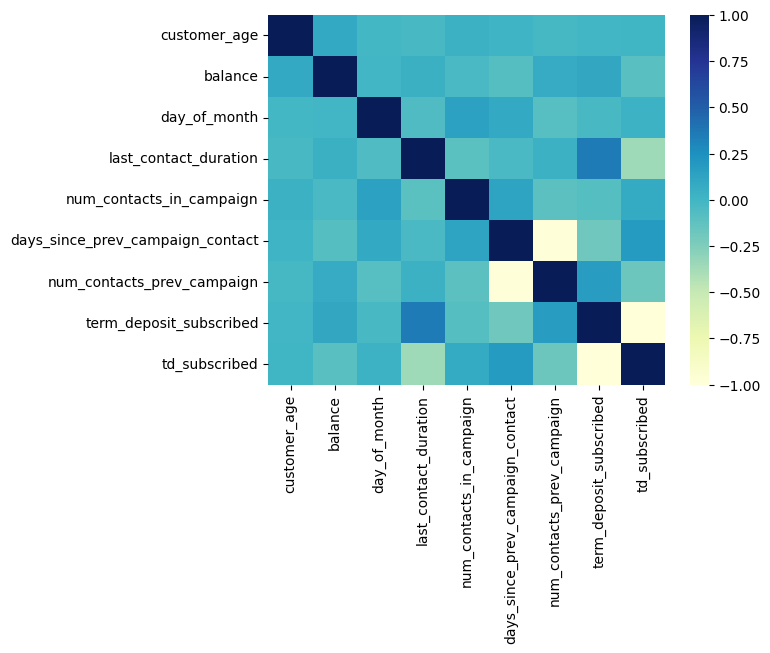

In [123]:
sns.heatmap(Ex_train.corr(method='spearman'), cmap='YlGnBu')

In [124]:
df_k=df_n.copy()

In [125]:
df_n.drop(['term_deposit_subscribed','td_subscribed'],axis=1,inplace=True)

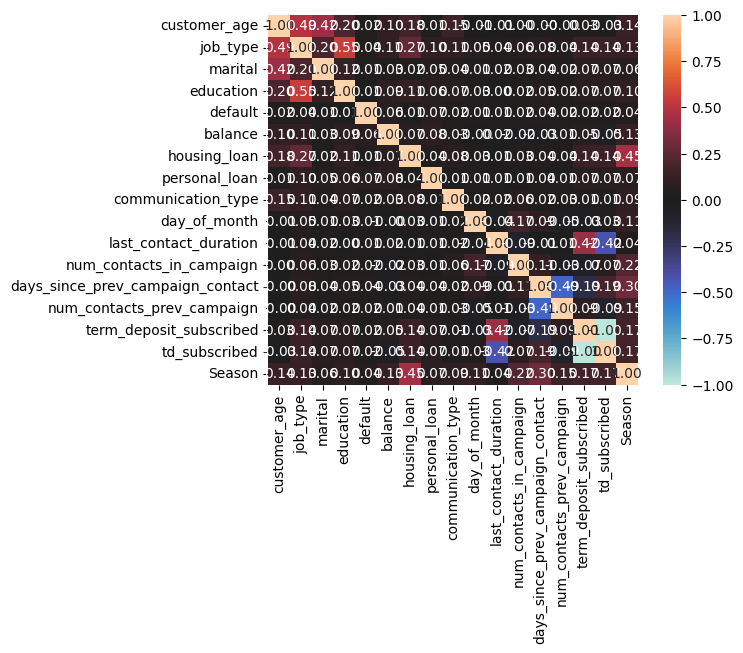

{'corr':                                   customer_age  job_type   marital  education  \
 customer_age                          1.000000  0.485586  0.422019   0.198383   
 job_type                              0.485586  1.000000  0.201192   0.550826   
 marital                               0.422019  0.201192  1.000000   0.122397   
 education                             0.198383  0.550826  0.122397   1.000000   
 default                               0.019082  0.036472  0.012773   0.005953   
 balance                               0.101924  0.105326  0.026623   0.087234   
 housing_loan                          0.177414  0.270010  0.018161   0.114687   
 personal_loan                         0.009834  0.101152  0.053596   0.064946   
 communication_type                    0.153464  0.108527  0.043360   0.068339   
 day_of_month                         -0.013934  0.050601  0.011358   0.025345   
 last_contact_duration                -0.006960  0.044542  0.020462   0.001566   
 num_con

In [126]:
associations(Ex_train)

In [127]:
f=df_n.values

In [128]:
f

array([[2.800e+01, 2.850e+02, 2.600e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.400e+01, 9.340e+02, 1.800e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.600e+01, 6.560e+02, 5.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [4.100e+01, 2.420e+02, 2.300e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [4.800e+01, 2.699e+03, 1.100e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.800e+01, 1.045e+03, 1.800e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [129]:
vif=[]
for i in range(f.shape[1]):
    vif.append(variance_inflation_factor(f[:,0:],i))

In [130]:
pd.DataFrame({'vif':vif},index=df_n.columns)

vif
customer_age                      14.776366
balance                            1.244684
day_of_month                       4.670729
last_contact_duration              1.987431
num_contacts_in_campaign           1.982052
days_since_prev_campaign_contact  11.425626
num_contacts_prev_campaign         1.332904
job_type_blue-collar               2.859537
job_type_entrepreneur              1.315682
job_type_housemaid                 1.292898
job_type_management                3.739761
job_type_retired                   1.759089
job_type_self-employed             1.352538
job_type_services                  1.729103
job_type_student                   1.174348
job_type_technician                2.377642
job_type_unemployed                1.248329
marital_married                    5.451828
marital_single                     3.116290
education_secondary                4.559343
education_tertiary                 4.313961
default_yes                        1.031642
housing_loan_yes                   2.961160
personal_loan_yes                  1.231810
communication_type_telephone       1.114867
Season_Spring                      4.179020
Season_Summer                      4.477801
Season_Winter                      1.666447

In [131]:
mul_co=['customer_age','days_since_prev_campaign_contact']

In [132]:
df_x=df_n.drop(mul_co,axis=1)

In [133]:
df_x.head()

balance  day_of_month  last_contact_duration  num_contacts_in_campaign  \
0    285.0            26                  303.0                       4.0   
1    934.0            18                  143.0                       2.0   
2    656.0             5                  101.0                       4.0   
3      2.0            20                  127.0                       3.0   
4   1352.0            13                   49.0                       2.0   

   num_contacts_prev_campaign  job_type_blue-collar  job_type_entrepreneur  \
0                           0                     0                      0   
1                           1                     1                      0   
2                           0                     0                      0   
3                           0                     0                      0   
4                           0                     1                      0   

   job_type_housemaid  job_type_management  job_type_retired  ...  \
0                   0                    1                 0  ...   
1                   0                    0                 0  ...   
2                   0                    0                 0  ...   
3                   0                    0                 0  ...   
4                   0                    0                 0  ...   

   marital_single  education_secondary  education_tertiary  default_yes  \
0               1                    0                   1            0   
1               0                    1                   0            0   
2               0                    1                   0            0   
3               1                    1                   0            0   
4               0                    0                   0            0   

   housing_loan_yes  personal_loan_yes  communication_type_telephone  \
0                 1                  0                             0   
1                 0                  1                             0   
2                 0                  0                             0   
3                 1                  0                             0   
4                 1                  0                             0   

   Season_Spring  Season_Summer  Season_Winter  
0              0              1              0  
1              0              0              0  
2              0              0              1  
3              1              0              0  
4              1              0              0  

[5 rows x 26 columns]

In [134]:
f1=df_x.values

In [135]:
f1

array([[2.850e+02, 2.600e+01, 3.030e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [9.340e+02, 1.800e+01, 1.430e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [6.560e+02, 5.000e+00, 1.010e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [2.420e+02, 2.300e+01, 8.900e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.699e+03, 1.100e+01, 2.160e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.045e+03, 1.800e+01, 1.830e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [136]:
vif=[]
for i in range(f1.shape[1]):
    vif.append(variance_inflation_factor(f1[:,0:],i))

In [137]:
pd.DataFrame({'vif':vif},index=df_x.columns)

vif
balance                       1.222019
day_of_month                  4.363567
last_contact_duration         1.960316
num_contacts_in_campaign      1.975470
num_contacts_prev_campaign    1.077875
job_type_blue-collar          2.556664
job_type_entrepreneur         1.259621
job_type_housemaid            1.206446
job_type_management           3.445849
job_type_retired              1.331403
job_type_self-employed        1.307511
job_type_services             1.647688
job_type_student              1.170683
job_type_technician           2.220309
job_type_unemployed           1.198015
marital_married               5.099342
marital_single                3.034310
education_secondary           4.199093
education_tertiary            4.179674
default_yes                   1.030722
housing_loan_yes              2.936054
personal_loan_yes             1.228791
communication_type_telephone  1.095305
Season_Spring                 3.769414
Season_Summer                 3.687147
Season_Winter                 1.573762

In [138]:
df_x.shape

(29544, 26)

In [139]:
df_k.drop(mul_co,axis=1,inplace=True)

In [140]:
df_k.drop('td_subscribed',axis=1,inplace=True)

## Modelling and Validation

In [141]:
X=df_k.drop(['term_deposit_subscribed'],axis=1).values
Y=df_k['term_deposit_subscribed'].values

In [142]:
X2=df_k.drop(['term_deposit_subscribed'],axis=1)

In [143]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size = 0.25,random_state=0) 

In [144]:
reg_clf=LogisticRegression()

In [145]:
reg_clf.fit(X_train,y_train)

LogisticRegression()

In [146]:
y_pred=reg_clf.predict(X_test)

In [147]:
#from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
#roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.894395   0.542683  0.220297   0.31338

In [148]:
df_train["term_deposit_subscribed"].value_counts()

0    26395
1     3149
Name: term_deposit_subscribed, dtype: int64

In [149]:
oversample= SMOTE()

In [150]:
X_res,y_res=oversample.fit_resample(X_train,y_train)

In [151]:
regr_clf2=LogisticRegression()

In [152]:
regr_clf2.fit(X_res,y_res)

LogisticRegression()

In [153]:
y_pred2=regr_clf2.predict(X_test)

In [154]:
acc = accuracy_score(y_test, y_pred2)
prec = precision_score(y_test, y_pred2)
rec = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.825074   0.361556  0.782178  0.494523

In [155]:
cm=confusion_matrix(y_test, y_pred2)

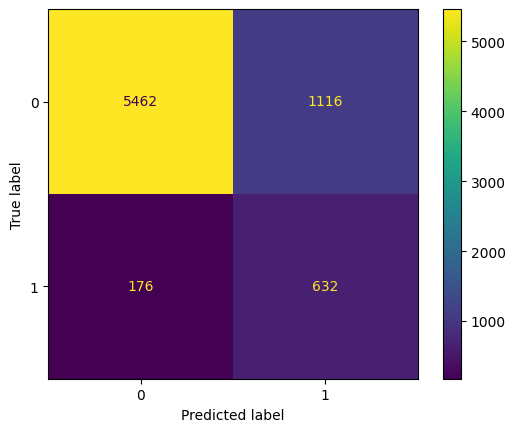

In [156]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

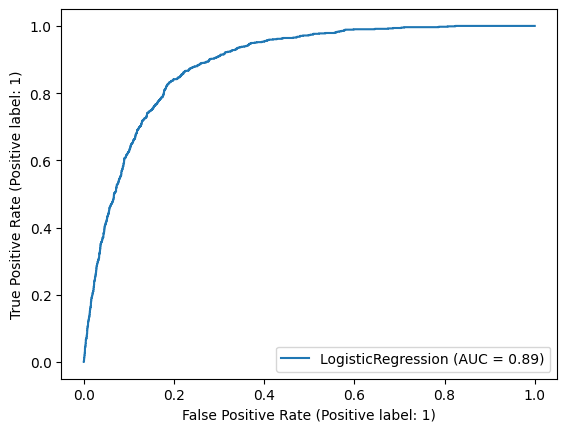

In [157]:
plot_roc_curve(regr_clf2, X_test, y_test) 

## Decision Tree Classifier

In [158]:
clf = ExtraTreesClassifier()

In [159]:
clf.fit(X_res,y_res)


ExtraTreesClassifier()

In [160]:
importance_scores = clf.feature_importances_

In [161]:
feature_names=X2.columns

In [162]:
for feature_name, score in zip(feature_names, importance_scores):
    print(f"Feature: {feature_name}, Importance Score: {score}")

Feature: balance, Importance Score: 0.03318943207597721
Feature: day_of_month, Importance Score: 0.039466967201456454
Feature: last_contact_duration, Importance Score: 0.18180408622432637
Feature: num_contacts_in_campaign, Importance Score: 0.022349999893591717
Feature: num_contacts_prev_campaign, Importance Score: 0.041986614164541435
Feature: job_type_blue-collar, Importance Score: 0.04016450373039025
Feature: job_type_entrepreneur, Importance Score: 0.003583580306835391
Feature: job_type_housemaid, Importance Score: 0.0038364163232350854
Feature: job_type_management, Importance Score: 0.034718174846730954
Feature: job_type_retired, Importance Score: 0.022774133284622744
Feature: job_type_self-employed, Importance Score: 0.005337761962952759
Feature: job_type_services, Importance Score: 0.012885504632946193
Feature: job_type_student, Importance Score: 0.008307029482934172
Feature: job_type_technician, Importance Score: 0.025902047855370095
Feature: job_type_unemployed, Importance Sco

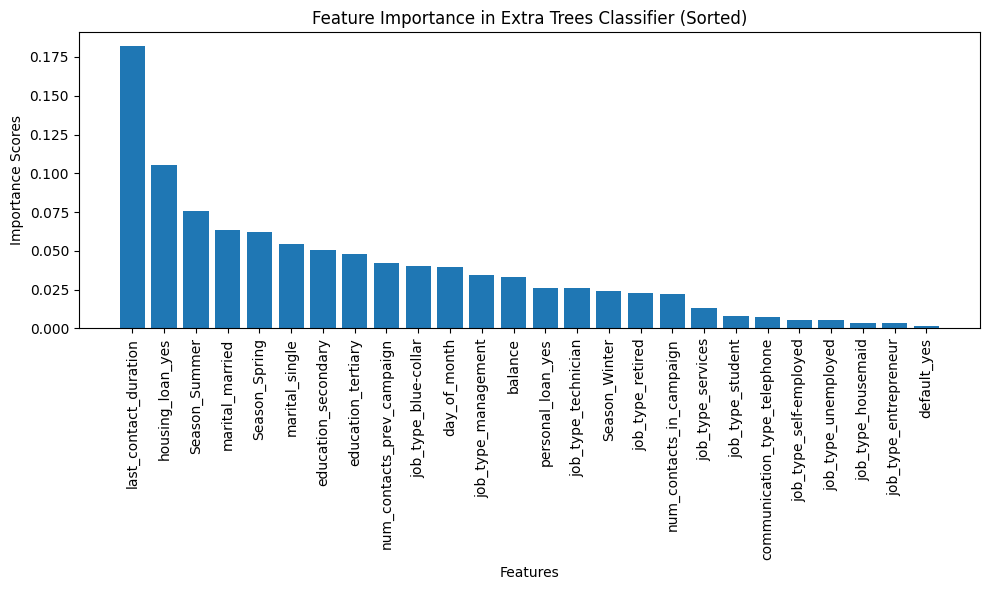

In [163]:
sorted_indices = np.argsort(importance_scores)[::-1]
sorted_scores = importance_scores[sorted_indices]
sorted_names = [feature_names[i] for i in sorted_indices]
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_scores)), sorted_scores, align='center')
plt.xticks(range(len(sorted_scores)), sorted_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.title('Feature Importance in Extra Trees Classifier (Sorted)')
plt.tight_layout()
plt.show()

In [164]:
tree_clf=DecisionTreeClassifier()

In [165]:
tree_clf.fit(X_res,y_res)

DecisionTreeClassifier()

In [166]:
y_pred_T=tree_clf.predict(X_test)

In [167]:
acc = accuracy_score(y_test, y_pred_T)
prec = precision_score(y_test, y_pred_T)
rec = recall_score(y_test, y_pred_T)
f1 = f1_score(y_test, y_pred_T)

results = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

Model  Accuracy  Precision    Recall  F1 Score
0  Decision Tree Classifier  0.875034   0.436182  0.486386  0.459918

In [168]:
cm3=confusion_matrix(y_test, y_pred_T)

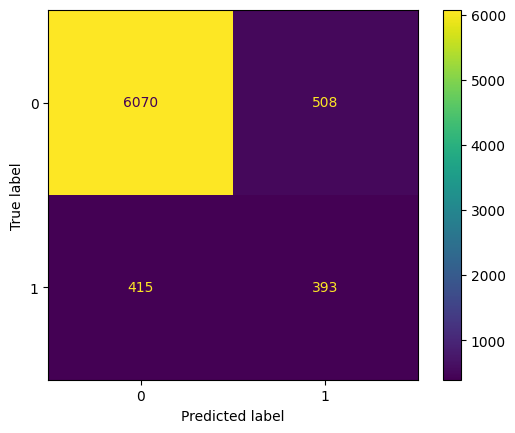

In [169]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot()
plt.show()

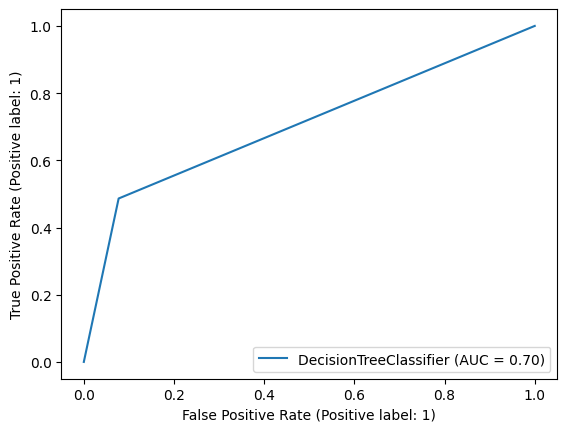

In [170]:
plot_roc_curve(tree_clf, X_test, y_test)

## Hyper Parameter Tuning 

In [171]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators',10,500, step=10)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    clf.fit(X_res,y_res)
    y_p=clf.predict(X_test)
    f1 = f1_score(y_test, y_p)
    return f1

In [172]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-07-02 12:23:49,908] A new study created in memory with name: no-name-9218a8e8-f038-43fb-b9f9-2423b3c2a61c
[I 2023-07-02 12:23:50,561] Trial 0 finished with value: 0.47651463580667114 and parameters: {'n_estimators': 20, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.47651463580667114.
[I 2023-07-02 12:23:58,781] Trial 1 finished with value: 0.5065666041275797 and parameters: {'n_estimators': 320, 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.5065666041275797.
[I 2023-07-02 12:24:00,210] Trial 2 finished with value: 0.47075405214940097 and parameters: {'n_estimators': 40, 'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.5065666041275797.
[I 2023-07-02 12:24:05,470] Trial 3 finished with value: 0.48745519713261654 and parameters: {'n_estimators': 240, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1 with va

[I 2023-07-02 12:28:31,438] Trial 36 finished with value: 0.5152498377676834 and parameters: {'n_estimators': 500, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 16 with value: 0.5273273273273273.
[I 2023-07-02 12:28:32,023] Trial 37 finished with value: 0.46838922484881806 and parameters: {'n_estimators': 30, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 16 with value: 0.5273273273273273.
[I 2023-07-02 12:28:42,066] Trial 38 finished with value: 0.5083166999334664 and parameters: {'n_estimators': 320, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 7}. Best is trial 16 with value: 0.5273273273273273.
[I 2023-07-02 12:28:44,202] Trial 39 finished with value: 0.4669479606188467 and parameters: {'n_estimators': 60, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 16 with value: 0.5273273273273273.
[I 2023-07-02 12:28:48,084] Trial 40 finished with value: 0.4635143023934617 and parame

[I 2023-07-02 12:31:18,545] Trial 72 finished with value: 0.5384615384615384 and parameters: {'n_estimators': 80, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 9}. Best is trial 72 with value: 0.5384615384615384.
[I 2023-07-02 12:31:20,555] Trial 73 finished with value: 0.5384615384615384 and parameters: {'n_estimators': 80, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 9}. Best is trial 72 with value: 0.5384615384615384.
[I 2023-07-02 12:31:22,625] Trial 74 finished with value: 0.5381008206330598 and parameters: {'n_estimators': 80, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 72 with value: 0.5384615384615384.
[I 2023-07-02 12:31:24,708] Trial 75 finished with value: 0.5381008206330598 and parameters: {'n_estimators': 80, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 72 with value: 0.5384615384615384.
[I 2023-07-02 12:31:25,651] Trial 76 finished with value: 0.47489663319551095 and paramete

In [173]:
best_params = study.best_params
best_value = study.best_value
print(best_params, best_value )

{'n_estimators': 20, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 9} 0.5386852821407796


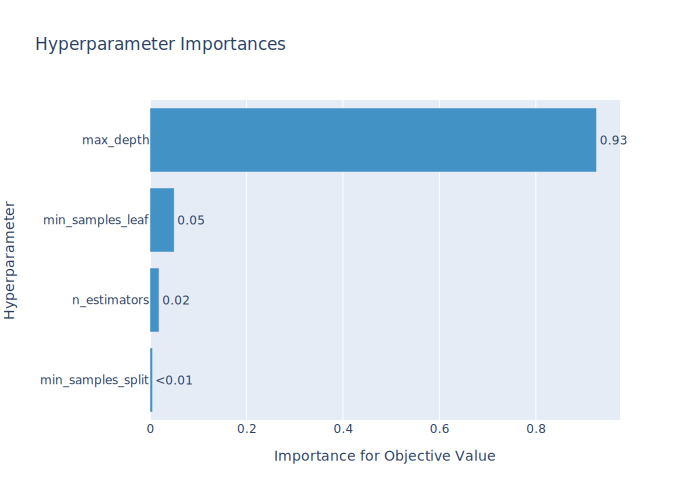

In [174]:
fig=plot_param_importances(study)
fig.show('svg')

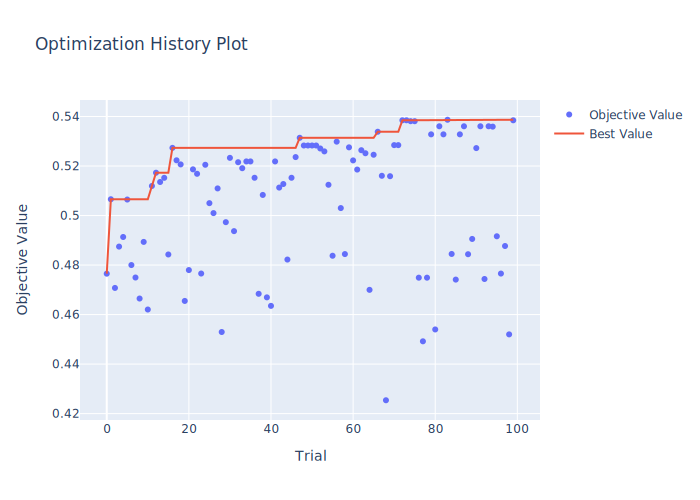

In [175]:
fig=plot_optimization_history(study)
fig.show('svg')

In [179]:
forest_clf=RandomForestClassifier(
        n_estimators=20,
        max_depth=6,
        min_samples_split=4,
        min_samples_leaf=9,
        random_state=42)

In [180]:
forest_clf.fit(X_res,y_res)

RandomForestClassifier(max_depth=6, min_samples_leaf=9, min_samples_split=4,
                       n_estimators=20, random_state=42)

In [181]:
y_pred_F=forest_clf.predict(X_test)

In [182]:
acc = accuracy_score(y_test, y_pred_F)
prec = precision_score(y_test, y_pred_F)
rec = recall_score(y_test, y_pred_F)
f1 = f1_score(y_test, y_pred_F)

results = pd.DataFrame([['Random Forest Classifier', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

Model  Accuracy  Precision   Recall  F1 Score
0  Random Forest Classifier  0.892635   0.508233  0.57302  0.538685

In [183]:
cm2=confusion_matrix(y_test, y_pred_F)

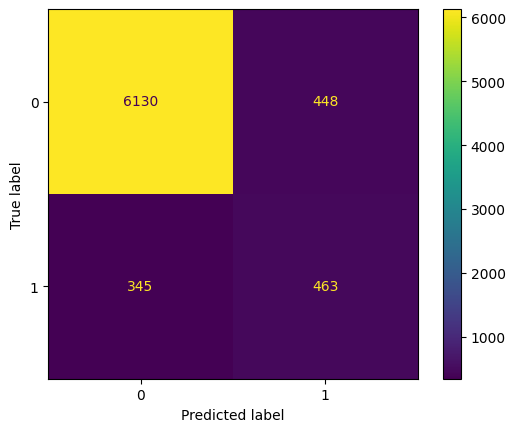

In [184]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()

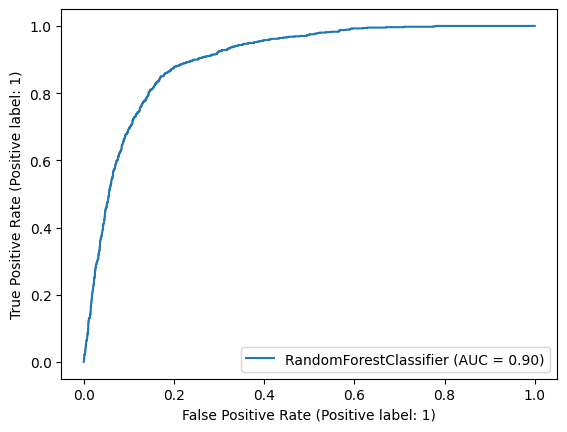

In [185]:
plot_roc_curve(forest_clf, X_test, y_test) 

## Test Data Cleaning 

In [186]:
df_test.head()

id  customer_age       job_type   marital  education default  \
0  id_17231          55.0        retired   married   tertiary      no   
1  id_34508          24.0    blue-collar    single  secondary      no   
2  id_44504          46.0     technician  divorced  secondary      no   
4   id_2115          62.0        retired   married  secondary      no   
5  id_20153          35.0  self-employed    single   tertiary      no   

   balance housing_loan personal_loan communication_type  day_of_month month  \
0   7136.0           no            no           cellular            13   aug   
1    179.0          yes            no           cellular            18   may   
2    143.0           no            no           cellular             8   jul   
4   2913.0           no            no           cellular            12   apr   
5    355.0           no            no           cellular            12   aug   

   last_contact_duration  num_contacts_in_campaign  \
0                   90.0                       2.0   
1                   63.0                       2.0   
2                  208.0                       1.0   
4                  127.0                       1.0   
5                  599.0                       1.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  
0                             999.0                           0  
1                             999.0                           0  
2                             999.0                           0  
4                             188.0                           1  
5                             999.0                           0

In [187]:
df_t.head()

customer_age  balance  day_of_month  last_contact_duration  \
0          55.0   7136.0            13                   90.0   
1          24.0    179.0            18                   63.0   
2          46.0    143.0             8                  208.0   
4          62.0   2913.0            12                  127.0   
5          35.0    355.0            12                  599.0   

   num_contacts_in_campaign  days_since_prev_campaign_contact  \
0                       2.0                             999.0   
1                       2.0                             999.0   
2                       1.0                             999.0   
4                       1.0                             188.0   
5                       1.0                             999.0   

   num_contacts_prev_campaign  job_type_blue-collar  job_type_entrepreneur  \
0                           0                     0                      0   
1                           0                     1                      0   
2                           0                     0                      0   
4                           1                     0                      0   
5                           0                     0                      0   

   job_type_housemaid  ...  marital_single  education_secondary  \
0                   0  ...               0                    0   
1                   0  ...               1                    1   
2                   0  ...               0                    1   
4                   0  ...               0                    1   
5                   0  ...               1                    0   

   education_tertiary  default_yes  housing_loan_yes  personal_loan_yes  \
0                   1            0                 0                  0   
1                   0            0                 1                  0   
2                   0            0                 0                  0   
4                   0            0                 0                  0   
5                   1            0                 0                  0   

   communication_type_telephone  Season_Spring  Season_Summer  Season_Winter  
0                             0              0              1              0  
1                             0              1              0              0  
2                             0              0              1              0  
4                             0              1              0              0  
5                             0              0              1              0  

[5 rows x 28 columns]

In [188]:
df_x.head()

balance  day_of_month  last_contact_duration  num_contacts_in_campaign  \
0    285.0            26                  303.0                       4.0   
1    934.0            18                  143.0                       2.0   
2    656.0             5                  101.0                       4.0   
3      2.0            20                  127.0                       3.0   
4   1352.0            13                   49.0                       2.0   

   num_contacts_prev_campaign  job_type_blue-collar  job_type_entrepreneur  \
0                           0                     0                      0   
1                           1                     1                      0   
2                           0                     0                      0   
3                           0                     0                      0   
4                           0                     1                      0   

   job_type_housemaid  job_type_management  job_type_retired  ...  \
0                   0                    1                 0  ...   
1                   0                    0                 0  ...   
2                   0                    0                 0  ...   
3                   0                    0                 0  ...   
4                   0                    0                 0  ...   

   marital_single  education_secondary  education_tertiary  default_yes  \
0               1                    0                   1            0   
1               0                    1                   0            0   
2               0                    1                   0            0   
3               1                    1                   0            0   
4               0                    0                   0            0   

   housing_loan_yes  personal_loan_yes  communication_type_telephone  \
0                 1                  0                             0   
1                 0                  1                             0   
2                 0                  0                             0   
3                 1                  0                             0   
4                 1                  0                             0   

   Season_Spring  Season_Summer  Season_Winter  
0              0              1              0  
1              0              0              0  
2              0              0              1  
3              1              0              0  
4              1              0              0  

[5 rows x 26 columns]

In [189]:
df_t.isnull().sum()

customer_age                        0
balance                             0
day_of_month                        0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
job_type_blue-collar                0
job_type_entrepreneur               0
job_type_housemaid                  0
job_type_management                 0
job_type_retired                    0
job_type_self-employed              0
job_type_services                   0
job_type_student                    0
job_type_technician                 0
job_type_unemployed                 0
marital_married                     0
marital_single                      0
education_secondary                 0
education_tertiary                  0
default_yes                         0
housing_loan_yes                    0
personal_loan_yes                   0
communication_type_telephone        0
Season_Spring                       0
Season_Summe

In [190]:
df_t.drop(mul_co,axis=1,inplace=True)

In [191]:
df_x.head()

balance  day_of_month  last_contact_duration  num_contacts_in_campaign  \
0    285.0            26                  303.0                       4.0   
1    934.0            18                  143.0                       2.0   
2    656.0             5                  101.0                       4.0   
3      2.0            20                  127.0                       3.0   
4   1352.0            13                   49.0                       2.0   

   num_contacts_prev_campaign  job_type_blue-collar  job_type_entrepreneur  \
0                           0                     0                      0   
1                           1                     1                      0   
2                           0                     0                      0   
3                           0                     0                      0   
4                           0                     1                      0   

   job_type_housemaid  job_type_management  job_type_retired  ...  \
0                   0                    1                 0  ...   
1                   0                    0                 0  ...   
2                   0                    0                 0  ...   
3                   0                    0                 0  ...   
4                   0                    0                 0  ...   

   marital_single  education_secondary  education_tertiary  default_yes  \
0               1                    0                   1            0   
1               0                    1                   0            0   
2               0                    1                   0            0   
3               1                    1                   0            0   
4               0                    0                   0            0   

   housing_loan_yes  personal_loan_yes  communication_type_telephone  \
0                 1                  0                             0   
1                 0                  1                             0   
2                 0                  0                             0   
3                 1                  0                             0   
4                 1                  0                             0   

   Season_Spring  Season_Summer  Season_Winter  
0              0              1              0  
1              0              0              0  
2              0              0              1  
3              1              0              0  
4              1              0              0  

[5 rows x 26 columns]

In [192]:
f2=df_t.values
f2

array([[7.136e+03, 1.300e+01, 9.000e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.790e+02, 1.800e+01, 6.300e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.430e+02, 8.000e+00, 2.080e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [6.040e+02, 1.000e+01, 1.550e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.370e+02, 1.600e+01, 2.310e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.410e+02, 1.300e+01, 2.430e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [193]:
predictions = forest_clf.predict(f2)

In [194]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [195]:
df_pred=pd.DataFrame(predictions,columns=['Term_Deposit_subscribed'])

In [196]:
df_final=pd.concat([df_test,df_pred],axis=1)

In [197]:
df_final.head(50)

id  customer_age       job_type   marital  education default  \
0   id_17231          55.0        retired   married   tertiary      no   
1   id_34508          24.0    blue-collar    single  secondary      no   
2   id_44504          46.0     technician  divorced  secondary      no   
4    id_2115          62.0        retired   married  secondary      no   
5   id_20153          35.0  self-employed    single   tertiary      no   
6   id_20552          27.0      housemaid    single  secondary      no   
7   id_26080          29.0     management    single   tertiary      no   
8   id_45165          50.0      housemaid   married  secondary      no   
9   id_28373          37.0     management    single   tertiary      no   
10  id_30676          52.0         admin.   married  secondary      no   
11  id_17527          51.0     technician   married  secondary      no   
12  id_31272          30.0     management    single   tertiary      no   
13  id_33164          32.0     technician    single  secondary      no   
14  id_39428          54.0      housemaid   married    primary      no   
15  id_33984          39.0     technician    single   tertiary      no   
16  id_28375          33.0     management    single   tertiary      no   
17  id_40781          33.0     management   married   tertiary      no   
20  id_20393          37.0         admin.   married  secondary      no   
21  id_19080          50.0      housemaid   married    primary      no   
22  id_24906          46.0    blue-collar   married  secondary      no   
23  id_29490          71.0        retired   married   tertiary      no   
25   id_9935          27.0     unemployed   married  secondary      no   
26  id_22074          33.0    blue-collar   married  secondary      no   
27  id_29079          55.0     management  divorced   tertiary      no   
29   id_8954          79.0        retired   married    primary      no   
30  id_22336          31.0    blue-collar   married  secondary      no   
31  id_43099          37.0        retired   married    primary      no   
33  id_42085          53.0    blue-collar   married  secondary      no   
34  id_38987          39.0     technician   married  secondary      no   
35  id_38527          22.0     management    single  secondary      no   
36  id_28334          66.0        retired   married   tertiary      no   
37  id_39797          49.0         admin.   married  secondary      no   
38  id_20965          29.0         admin.  divorced  secondary      no   
39   id_1411          46.0     management   married   tertiary      no   
40  id_17575          35.0    blue-collar   married    primary      no   
41  id_39429          38.0     management   married   tertiary      no   
42  id_25694          40.0         admin.   married  secondary      no   
43  id_23924          34.0    blue-collar   married  secondary      no   
44   id_4383          51.0     technician   married  secondary     yes   
45  id_15060          35.0    blue-collar   married  secondary      no   
46  id_13009          57.0   entrepreneur  divorced  secondary     yes   
47  id_12884          58.0        retired   married    primary      no   
48  id_10903          27.0         admin.  divorced  secondary      no   
49  id_15789          37.0     technician    single  secondary      no   
50  id_43487          32.0         admin.   married   tertiary      no   
51   id_1585          40.0     management   married   tertiary      no   
52  id_25017          32.0    blue-collar    single  secondary      no   
53  id_26988          41.0       services   married  secondary      no   
54  id_38952          27.0         admin.    single   tertiary      no   
55  id_35203          43.0     management   married   tertiary      no   

    balance housing_loan personal_loan communication_type  day_of_month month  \
0    7136.0           no            no           cellular          13.0   aug   
1     179.0          yes            no           cellular          18.0  